# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [3]:
!pip install pymongo

     |████████████████████████████████| 509 kB 13.4 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install pymongo[srv]

     |████████████████████████████████| 188 kB 22.6 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [6]:
!pip install tweepy

     |████████████████████████████████| 147 kB 21.6 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [7]:
!pip install twitter

     |████████████████████████████████| 54 kB 2.8 MB/s  eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [8]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [9]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [10]:
client = MongoClient(mongod_connect)
db = client.gp12 # use or create a database named demo
tweet_collection = db.lab11 #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [11]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [12]:
track = ['election'] # define the keywords, tweets contain election

locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [15]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#  (locations = locations)   #Use either track or locations

1330642603692453891
1330642603990249472
1330642604233469953
1330642605047222272
1330642605059813378
1330642605525192706
1330642605579915265
1330642605613322241
1330642605508599809
1330642605697359874
1330642605575720962
1330642605730881541
1330642605844037632
1330642606146035717
1330642606196363264
1330642606284533760
1330642606305529862
1330642606305419264
1330642606452133888
1330642606548803585
1330642606762696708
1330642607060508672
1330642607123427336
1330642607307886593
1330642607337218048
1330642607408635905
1330642607727284225
1330642607651766272
1330642608327192577
1330642608742395909
1330642608884908034
1330642609023320064
1330642609199607811
1330642609514037249
1330642609795190784
1330642609744785413
1330642610004791296
1330642610147389441
1330642610185068546
1330642610281648128
1330642610508210178
1330642610747289601
1330642610847850496
1330642610785050625
1330642610873118720
1330642611040702464
1330642611091156994
1330642611124789251
1330642611070259204
1330642611284045825


1330642678791344128
1330642678514593793
1330642679135342592
1330642679118639104
1330642679328280576
1330642679294795785
1330642679475163141
1330642679437303808
1330642679475081217
1330642679454167040
1330642679621853185
1330642679575834628
1330642679793905664
1330642679915417600
1330642679982678021
1330642679957495809
1330642679991070723
1330642679923871744
1330642680209166346
1330642680372727809
1330642680649543680
1330642680699817987
1330642680745922560
1330642680808923136
1330642681022664705
1330642681106731010
1330642680871870465
1330642681085693960
1330642681526169603
1330642681987469312
1330642682092396545
1330642681953923072
1330642682058772480
1330642682541031424
1330642682503254016
1330642683023532032
1330642683564462080
1330642683598172162
1330642683719774217
1330642683916922881
1330642683858137090
1330642683937890306
1330642684051156993
1330642684101369856
1330642684046925824
1330642684491542530
1330642684743135233
1330642684722089984
1330642684894035969
1330642685041004546


KeyboardInterrupt: 

## Use the REST API to Collect Tweets

Authorize the REST API 

In [13]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [14]:
count = 100 #number of returned tweets, default and max is 100
geocode = "37.5247764,-77.5633011,150mi"  # defin the location, in Harrisonburg, VA
q = "covid19"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [15]:
search_results = rest_api.search.tweets(count=count,q=q, geocode=geocode) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Sun Nov 22 23:14:46 +0000 2020'
'Sun Nov 22 23:14:37 +0000 2020'
'Sun Nov 22 23:14:23 +0000 2020'
'Sun Nov 22 23:14:02 +0000 2020'
'Sun Nov 22 23:13:55 +0000 2020'
'Sun Nov 22 23:13:43 +0000 2020'
'Sun Nov 22 23:13:37 +0000 2020'
'Sun Nov 22 23:13:20 +0000 2020'
'Sun Nov 22 23:13:16 +0000 2020'
'Sun Nov 22 23:13:06 +0000 2020'
'Sun Nov 22 23:12:56 +0000 2020'
'Sun Nov 22 23:12:52 +0000 2020'
'Sun Nov 22 23:12:43 +0000 2020'
'Sun Nov 22 23:12:18 +0000 2020'
'Sun Nov 22 23:12:17 +0000 2020'
'Sun Nov 22 23:12:16 +0000 2020'
'Sun Nov 22 23:12:12 +0000 2020'
'Sun Nov 22 23:12:05 +0000 2020'
'Sun Nov 22 23:12:00 +0000 2020'
'Sun Nov 22 23:11:22 +0000 2020'
'Sun Nov 22 23:10:54 +0000 2020'
'Sun Nov 22 23:10:50 +0000 2020'
'Sun Nov 22 23:10:20 +0000 2020'
'Sun Nov 22 23:09:59 +0000 2020'
'Sun Nov 22 23:09:55 +0000 2020'
'Sun Nov 22 23:09:11 +0000 2020'
'Sun Nov 22 23:08:21 +0000 2020'
'Sun Nov 22 23:07:27 +0000 2020'
'Sun Nov 22 23:06:52 +0000 2020'
'Sun Nov 22 23:06:50 +0000 2020'
'Sun Nov 2

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [16]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                        geocode=geocode, max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Sun Nov 22 22:54:26 +0000 2020'
'Sun Nov 22 22:53:50 +0000 2020'
'Sun Nov 22 22:53:48 +0000 2020'
'Sun Nov 22 22:53:41 +0000 2020'
'Sun Nov 22 22:53:36 +0000 2020'
'Sun Nov 22 22:53:25 +0000 2020'
'Sun Nov 22 22:53:21 +0000 2020'
'Sun Nov 22 22:52:53 +0000 2020'
'Sun Nov 22 22:52:51 +0000 2020'
'Sun Nov 22 22:52:42 +0000 2020'
'Sun Nov 22 22:52:35 +0000 2020'
'Sun Nov 22 22:52:26 +0000 2020'
'Sun Nov 22 22:52:20 +0000 2020'
'Sun Nov 22 22:52:14 +0000 2020'
'Sun Nov 22 22:52:00 +0000 2020'
'Sun Nov 22 22:51:28 +0000 2020'
'Sun Nov 22 22:35:07 +0000 2020'
'Sun Nov 22 22:35:01 +0000 2020'
'Sun Nov 22 22:34:42 +0000 2020'
'Sun Nov 22 22:34:35 +0000 2020'
'Sun Nov 22 22:34:26 +0000 2020'
'Sun Nov 22 22:34:12 +0000 2020'
'Sun Nov 22 22:34:05 +0000 2020'
'Sun Nov 22 22:34:04 +0000 2020'
'Sun Nov 22 22:33:57 +0000 2020'
'Sun Nov 22 22:33:49 +0000 2020'
'Sun Nov 22 22:33:41 +0000 2020'
'Sun Nov 22 22:33:29 +0000 2020'
'Sun Nov 22 22:33:21 +0000 2020'
'Sun Nov 22 22:33:20 +0000 2020'
'Sun Nov 2

'Sun Nov 22 21:57:15 +0000 2020'
'Sun Nov 22 21:56:50 +0000 2020'
'Sun Nov 22 21:56:39 +0000 2020'
'Sun Nov 22 21:56:35 +0000 2020'
'Sun Nov 22 21:55:38 +0000 2020'
'Sun Nov 22 21:55:34 +0000 2020'
'Sun Nov 22 21:55:24 +0000 2020'
'Sun Nov 22 21:55:21 +0000 2020'
'Sun Nov 22 21:55:15 +0000 2020'
'Sun Nov 22 21:55:12 +0000 2020'
'Sun Nov 22 21:55:00 +0000 2020'
'Sun Nov 22 21:54:54 +0000 2020'
'Sun Nov 22 21:54:53 +0000 2020'
'Sun Nov 22 21:54:22 +0000 2020'
'Sun Nov 22 21:54:12 +0000 2020'
'Sun Nov 22 21:54:05 +0000 2020'
'Sun Nov 22 21:53:51 +0000 2020'
'Sun Nov 22 21:53:39 +0000 2020'
'Sun Nov 22 21:53:26 +0000 2020'
'Sun Nov 22 21:52:59 +0000 2020'
'Sun Nov 22 21:51:53 +0000 2020'
'Sun Nov 22 21:51:45 +0000 2020'
'Sun Nov 22 21:51:35 +0000 2020'
'Sun Nov 22 21:50:57 +0000 2020'
'Sun Nov 22 21:50:54 +0000 2020'
'Sun Nov 22 21:50:14 +0000 2020'
'Sun Nov 22 21:49:43 +0000 2020'
'Sun Nov 22 21:48:10 +0000 2020'
'Sun Nov 22 21:48:08 +0000 2020'
'Sun Nov 22 21:47:59 +0000 2020'
'Sun Nov 2

'Sun Nov 22 21:02:58 +0000 2020'
'Sun Nov 22 21:02:57 +0000 2020'
'Sun Nov 22 21:02:35 +0000 2020'
'Sun Nov 22 21:02:13 +0000 2020'
'Sun Nov 22 21:02:04 +0000 2020'
'Sun Nov 22 21:01:56 +0000 2020'
'Sun Nov 22 21:01:50 +0000 2020'
'Sun Nov 22 21:01:49 +0000 2020'
'Sun Nov 22 21:01:48 +0000 2020'
'Sun Nov 22 21:01:18 +0000 2020'
'Sun Nov 22 21:01:17 +0000 2020'
'Sun Nov 22 21:00:34 +0000 2020'
'Sun Nov 22 21:00:24 +0000 2020'
'Sun Nov 22 21:00:10 +0000 2020'
'Sun Nov 22 21:00:04 +0000 2020'
'Sun Nov 22 21:00:03 +0000 2020'
'Sun Nov 22 21:00:02 +0000 2020'
'Sun Nov 22 21:00:02 +0000 2020'
'Sun Nov 22 21:00:01 +0000 2020'
'Sun Nov 22 20:59:52 +0000 2020'
'Sun Nov 22 20:59:45 +0000 2020'
'Sun Nov 22 20:59:39 +0000 2020'
'Sun Nov 22 20:59:39 +0000 2020'
'Sun Nov 22 20:59:37 +0000 2020'
'Sun Nov 22 20:59:00 +0000 2020'
'Sun Nov 22 20:58:54 +0000 2020'
'Sun Nov 22 20:58:45 +0000 2020'
'Sun Nov 22 20:58:44 +0000 2020'
'Sun Nov 22 20:58:31 +0000 2020'
'Sun Nov 22 20:58:30 +0000 2020'
'Sun Nov 2

'Sun Nov 22 20:02:27 +0000 2020'
'Sun Nov 22 20:02:03 +0000 2020'
'Sun Nov 22 20:02:01 +0000 2020'
'Sun Nov 22 20:01:53 +0000 2020'
'Sun Nov 22 20:01:25 +0000 2020'
'Sun Nov 22 20:01:21 +0000 2020'
'Sun Nov 22 20:01:15 +0000 2020'
'Sun Nov 22 20:01:07 +0000 2020'
'Sun Nov 22 20:00:55 +0000 2020'
'Sun Nov 22 20:00:51 +0000 2020'
'Sun Nov 22 20:00:44 +0000 2020'
'Sun Nov 22 20:00:44 +0000 2020'
'Sun Nov 22 20:00:43 +0000 2020'
'Sun Nov 22 20:00:29 +0000 2020'
'Sun Nov 22 20:00:27 +0000 2020'
'Sun Nov 22 20:00:13 +0000 2020'
'Sun Nov 22 20:00:09 +0000 2020'
'Sun Nov 22 20:00:05 +0000 2020'
'Sun Nov 22 20:00:03 +0000 2020'
'Sun Nov 22 20:00:03 +0000 2020'
'Sun Nov 22 20:00:01 +0000 2020'
'Sun Nov 22 20:00:00 +0000 2020'
'Sun Nov 22 20:00:00 +0000 2020'
'Sun Nov 22 19:59:55 +0000 2020'
'Sun Nov 22 19:59:37 +0000 2020'
'Sun Nov 22 19:59:21 +0000 2020'
'Sun Nov 22 19:59:00 +0000 2020'
'Sun Nov 22 19:58:47 +0000 2020'
'Sun Nov 22 19:58:39 +0000 2020'
'Sun Nov 22 19:58:31 +0000 2020'
'Sun Nov 2

'Sun Nov 22 19:19:36 +0000 2020'
'Sun Nov 22 19:19:22 +0000 2020'
'Sun Nov 22 19:19:07 +0000 2020'
'Sun Nov 22 19:18:18 +0000 2020'
'Sun Nov 22 19:18:16 +0000 2020'
'Sun Nov 22 19:18:07 +0000 2020'
'Sun Nov 22 19:18:07 +0000 2020'
'Sun Nov 22 19:17:57 +0000 2020'
'Sun Nov 22 19:17:33 +0000 2020'
'Sun Nov 22 19:17:29 +0000 2020'
'Sun Nov 22 19:17:22 +0000 2020'
'Sun Nov 22 19:16:51 +0000 2020'
'Sun Nov 22 19:16:41 +0000 2020'
'Sun Nov 22 19:16:34 +0000 2020'
'Sun Nov 22 19:16:19 +0000 2020'
'Sun Nov 22 19:16:05 +0000 2020'
'Sun Nov 22 19:16:00 +0000 2020'
'Sun Nov 22 19:15:41 +0000 2020'
'Sun Nov 22 19:15:28 +0000 2020'
'Sun Nov 22 19:15:25 +0000 2020'
'Sun Nov 22 19:15:22 +0000 2020'
'Sun Nov 22 19:15:11 +0000 2020'
'Sun Nov 22 19:14:59 +0000 2020'
'Sun Nov 22 19:14:58 +0000 2020'
'Sun Nov 22 19:14:57 +0000 2020'
'Sun Nov 22 19:14:31 +0000 2020'
'Sun Nov 22 19:14:24 +0000 2020'
'Sun Nov 22 19:14:10 +0000 2020'
'Sun Nov 22 19:13:54 +0000 2020'
'Sun Nov 22 19:13:32 +0000 2020'
'Sun Nov 2

'Sun Nov 22 18:44:34 +0000 2020'
'Sun Nov 22 18:44:21 +0000 2020'
'Sun Nov 22 18:44:11 +0000 2020'
'Sun Nov 22 18:44:04 +0000 2020'
'Sun Nov 22 18:44:02 +0000 2020'
'Sun Nov 22 18:44:01 +0000 2020'
'Sun Nov 22 18:43:12 +0000 2020'
'Sun Nov 22 18:43:11 +0000 2020'
'Sun Nov 22 18:43:06 +0000 2020'
'Sun Nov 22 18:42:55 +0000 2020'
'Sun Nov 22 18:42:53 +0000 2020'
'Sun Nov 22 18:42:44 +0000 2020'
'Sun Nov 22 18:42:17 +0000 2020'
'Sun Nov 22 18:42:07 +0000 2020'
'Sun Nov 22 18:41:57 +0000 2020'
'Sun Nov 22 18:41:49 +0000 2020'
'Sun Nov 22 18:41:29 +0000 2020'
'Sun Nov 22 18:41:21 +0000 2020'
'Sun Nov 22 18:41:15 +0000 2020'
'Sun Nov 22 18:41:02 +0000 2020'
'Sun Nov 22 18:40:56 +0000 2020'
'Sun Nov 22 18:40:49 +0000 2020'
'Sun Nov 22 18:40:29 +0000 2020'
'Sun Nov 22 18:40:24 +0000 2020'
'Sun Nov 22 18:40:07 +0000 2020'
'Sun Nov 22 18:40:04 +0000 2020'
'Sun Nov 22 18:40:00 +0000 2020'
'Sun Nov 22 18:39:51 +0000 2020'
'Sun Nov 22 18:39:37 +0000 2020'
'Sun Nov 22 18:39:37 +0000 2020'
'Sun Nov 2

'Sun Nov 22 18:02:47 +0000 2020'
'Sun Nov 22 18:02:33 +0000 2020'
'Sun Nov 22 18:02:26 +0000 2020'
'Sun Nov 22 18:02:12 +0000 2020'
'Sun Nov 22 18:02:08 +0000 2020'
'Sun Nov 22 18:02:04 +0000 2020'
'Sun Nov 22 18:01:32 +0000 2020'
'Sun Nov 22 18:01:30 +0000 2020'
'Sun Nov 22 18:01:08 +0000 2020'
'Sun Nov 22 18:01:08 +0000 2020'
'Sun Nov 22 18:01:03 +0000 2020'
'Sun Nov 22 18:01:01 +0000 2020'
'Sun Nov 22 18:01:01 +0000 2020'
'Sun Nov 22 18:00:58 +0000 2020'
'Sun Nov 22 18:00:54 +0000 2020'
'Sun Nov 22 18:00:51 +0000 2020'
'Sun Nov 22 18:00:49 +0000 2020'
'Sun Nov 22 18:00:44 +0000 2020'
'Sun Nov 22 18:00:41 +0000 2020'
'Sun Nov 22 18:00:41 +0000 2020'
'Sun Nov 22 18:00:37 +0000 2020'
'Sun Nov 22 18:00:32 +0000 2020'
'Sun Nov 22 18:00:18 +0000 2020'
'Sun Nov 22 18:00:15 +0000 2020'
'Sun Nov 22 18:00:14 +0000 2020'
'Sun Nov 22 18:00:10 +0000 2020'
'Sun Nov 22 18:00:06 +0000 2020'
'Sun Nov 22 18:00:06 +0000 2020'
'Sun Nov 22 18:00:01 +0000 2020'
'Sun Nov 22 17:59:54 +0000 2020'
'Sun Nov 2

'Sun Nov 22 17:34:49 +0000 2020'
'Sun Nov 22 17:34:45 +0000 2020'
'Sun Nov 22 17:34:41 +0000 2020'
'Sun Nov 22 17:34:40 +0000 2020'
'Sun Nov 22 17:34:19 +0000 2020'
'Sun Nov 22 17:34:17 +0000 2020'
'Sun Nov 22 17:34:12 +0000 2020'
'Sun Nov 22 17:33:50 +0000 2020'
'Sun Nov 22 17:33:41 +0000 2020'
'Sun Nov 22 17:33:36 +0000 2020'
'Sun Nov 22 17:33:27 +0000 2020'
'Sun Nov 22 17:33:27 +0000 2020'
'Sun Nov 22 17:33:26 +0000 2020'
'Sun Nov 22 17:33:21 +0000 2020'
'Sun Nov 22 17:33:16 +0000 2020'
'Sun Nov 22 17:33:16 +0000 2020'
'Sun Nov 22 17:33:15 +0000 2020'
'Sun Nov 22 17:33:09 +0000 2020'
'Sun Nov 22 17:33:01 +0000 2020'
'Sun Nov 22 17:33:00 +0000 2020'
'Sun Nov 22 17:32:57 +0000 2020'
'Sun Nov 22 17:32:17 +0000 2020'
'Sun Nov 22 17:32:03 +0000 2020'
'Sun Nov 22 17:31:39 +0000 2020'
'Sun Nov 22 17:31:36 +0000 2020'
'Sun Nov 22 17:31:35 +0000 2020'
'Sun Nov 22 17:31:20 +0000 2020'
'Sun Nov 22 17:31:17 +0000 2020'
'Sun Nov 22 17:31:00 +0000 2020'
'Sun Nov 22 17:30:58 +0000 2020'
'Sun Nov 2

'Sun Nov 22 17:08:16 +0000 2020'
'Sun Nov 22 17:08:14 +0000 2020'
'Sun Nov 22 17:08:07 +0000 2020'
'Sun Nov 22 17:08:07 +0000 2020'
'Sun Nov 22 17:08:05 +0000 2020'
'Sun Nov 22 17:08:01 +0000 2020'
'Sun Nov 22 17:08:01 +0000 2020'
'Sun Nov 22 17:07:59 +0000 2020'
'Sun Nov 22 17:07:56 +0000 2020'
'Sun Nov 22 17:07:55 +0000 2020'
'Sun Nov 22 17:07:51 +0000 2020'
'Sun Nov 22 17:07:48 +0000 2020'
'Sun Nov 22 17:07:45 +0000 2020'
'Sun Nov 22 17:07:34 +0000 2020'
'Sun Nov 22 17:07:31 +0000 2020'
'Sun Nov 22 17:07:25 +0000 2020'
'Sun Nov 22 17:07:23 +0000 2020'
'Sun Nov 22 17:07:22 +0000 2020'
'Sun Nov 22 17:07:16 +0000 2020'
'Sun Nov 22 17:07:15 +0000 2020'
'Sun Nov 22 17:07:15 +0000 2020'
'Sun Nov 22 17:07:13 +0000 2020'
'Sun Nov 22 17:07:12 +0000 2020'
'Sun Nov 22 17:07:10 +0000 2020'
'Sun Nov 22 17:07:08 +0000 2020'
'Sun Nov 22 17:07:07 +0000 2020'
'Sun Nov 22 17:07:06 +0000 2020'
'Sun Nov 22 17:06:58 +0000 2020'
'Sun Nov 22 17:06:50 +0000 2020'
'Sun Nov 22 17:06:46 +0000 2020'
'Sun Nov 2

'Sun Nov 22 16:31:24 +0000 2020'
'Sun Nov 22 16:31:17 +0000 2020'
'Sun Nov 22 16:31:08 +0000 2020'
'Sun Nov 22 16:31:04 +0000 2020'
'Sun Nov 22 16:31:02 +0000 2020'
'Sun Nov 22 16:31:01 +0000 2020'
'Sun Nov 22 16:30:58 +0000 2020'
'Sun Nov 22 16:30:45 +0000 2020'
'Sun Nov 22 16:30:42 +0000 2020'
'Sun Nov 22 16:30:34 +0000 2020'
'Sun Nov 22 16:30:28 +0000 2020'
'Sun Nov 22 16:30:25 +0000 2020'
'Sun Nov 22 16:30:23 +0000 2020'
'Sun Nov 22 16:30:23 +0000 2020'
'Sun Nov 22 16:30:19 +0000 2020'
'Sun Nov 22 16:30:08 +0000 2020'
'Sun Nov 22 16:30:01 +0000 2020'
'Sun Nov 22 16:29:59 +0000 2020'
'Sun Nov 22 16:29:57 +0000 2020'
'Sun Nov 22 16:29:42 +0000 2020'
'Sun Nov 22 16:29:42 +0000 2020'
'Sun Nov 22 16:29:30 +0000 2020'
'Sun Nov 22 16:29:25 +0000 2020'
'Sun Nov 22 16:29:17 +0000 2020'
'Sun Nov 22 16:29:05 +0000 2020'
'Sun Nov 22 16:28:24 +0000 2020'
'Sun Nov 22 16:28:09 +0000 2020'
'Sun Nov 22 16:28:05 +0000 2020'
'Sun Nov 22 16:28:04 +0000 2020'
'Sun Nov 22 16:28:00 +0000 2020'
'Sun Nov 2

'Sun Nov 22 15:45:53 +0000 2020'
'Sun Nov 22 15:45:51 +0000 2020'
'Sun Nov 22 15:45:21 +0000 2020'
'Sun Nov 22 15:45:09 +0000 2020'
'Sun Nov 22 15:45:07 +0000 2020'
'Sun Nov 22 15:45:06 +0000 2020'
'Sun Nov 22 15:45:05 +0000 2020'
'Sun Nov 22 15:45:03 +0000 2020'
'Sun Nov 22 15:45:01 +0000 2020'
'Sun Nov 22 15:44:55 +0000 2020'
'Sun Nov 22 15:44:32 +0000 2020'
'Sun Nov 22 15:44:26 +0000 2020'
'Sun Nov 22 15:44:16 +0000 2020'
'Sun Nov 22 15:43:47 +0000 2020'
'Sun Nov 22 15:43:46 +0000 2020'
'Sun Nov 22 15:43:39 +0000 2020'
'Sun Nov 22 15:43:30 +0000 2020'
'Sun Nov 22 15:42:58 +0000 2020'
'Sun Nov 22 15:42:56 +0000 2020'
'Sun Nov 22 15:42:54 +0000 2020'
'Sun Nov 22 15:42:50 +0000 2020'
'Sun Nov 22 15:42:43 +0000 2020'
'Sun Nov 22 15:42:40 +0000 2020'
'Sun Nov 22 15:42:24 +0000 2020'
'Sun Nov 22 15:42:20 +0000 2020'
'Sun Nov 22 15:42:14 +0000 2020'
'Sun Nov 22 15:42:13 +0000 2020'
'Sun Nov 22 15:41:55 +0000 2020'
'Sun Nov 22 15:41:33 +0000 2020'
'Sun Nov 22 15:41:32 +0000 2020'
'Sun Nov 2

'Sun Nov 22 14:55:06 +0000 2020'
'Sun Nov 22 14:55:02 +0000 2020'
'Sun Nov 22 14:54:48 +0000 2020'
'Sun Nov 22 14:52:46 +0000 2020'
'Sun Nov 22 14:52:20 +0000 2020'
'Sun Nov 22 14:52:20 +0000 2020'
'Sun Nov 22 14:52:20 +0000 2020'
'Sun Nov 22 14:52:15 +0000 2020'
'Sun Nov 22 14:52:05 +0000 2020'
'Sun Nov 22 14:51:21 +0000 2020'
'Sun Nov 22 14:51:06 +0000 2020'
'Sun Nov 22 14:51:03 +0000 2020'
'Sun Nov 22 14:51:02 +0000 2020'
'Sun Nov 22 14:50:58 +0000 2020'
'Sun Nov 22 14:50:23 +0000 2020'
'Sun Nov 22 14:50:15 +0000 2020'
'Sun Nov 22 14:49:26 +0000 2020'
'Sun Nov 22 14:48:38 +0000 2020'
'Sun Nov 22 14:47:52 +0000 2020'
'Sun Nov 22 14:47:29 +0000 2020'
'Sun Nov 22 14:47:26 +0000 2020'
'Sun Nov 22 14:46:58 +0000 2020'
'Sun Nov 22 14:46:47 +0000 2020'
'Sun Nov 22 14:46:46 +0000 2020'
'Sun Nov 22 14:46:42 +0000 2020'
'Sun Nov 22 14:46:37 +0000 2020'
'Sun Nov 22 14:46:24 +0000 2020'
'Sun Nov 22 14:45:59 +0000 2020'
'Sun Nov 22 14:45:41 +0000 2020'
'Sun Nov 22 14:45:38 +0000 2020'
'Sun Nov 2

'Sun Nov 22 13:25:45 +0000 2020'
'Sun Nov 22 13:25:28 +0000 2020'
'Sun Nov 22 13:25:09 +0000 2020'
'Sun Nov 22 13:25:04 +0000 2020'
'Sun Nov 22 13:24:21 +0000 2020'
'Sun Nov 22 13:24:12 +0000 2020'
'Sun Nov 22 13:23:41 +0000 2020'
'Sun Nov 22 13:23:34 +0000 2020'
'Sun Nov 22 13:22:20 +0000 2020'
'Sun Nov 22 13:20:52 +0000 2020'
'Sun Nov 22 13:20:21 +0000 2020'
'Sun Nov 22 13:18:58 +0000 2020'
'Sun Nov 22 13:18:24 +0000 2020'
'Sun Nov 22 13:18:04 +0000 2020'
'Sun Nov 22 13:17:35 +0000 2020'
'Sun Nov 22 13:17:32 +0000 2020'
'Sun Nov 22 13:17:28 +0000 2020'
'Sun Nov 22 13:17:14 +0000 2020'
'Sun Nov 22 13:16:48 +0000 2020'
'Sun Nov 22 13:16:28 +0000 2020'
'Sun Nov 22 13:16:25 +0000 2020'
'Sun Nov 22 13:16:08 +0000 2020'
'Sun Nov 22 13:15:41 +0000 2020'
'Sun Nov 22 13:15:05 +0000 2020'
'Sun Nov 22 13:14:58 +0000 2020'
'Sun Nov 22 13:14:50 +0000 2020'
'Sun Nov 22 13:13:18 +0000 2020'
'Sun Nov 22 13:13:15 +0000 2020'
'Sun Nov 22 13:12:55 +0000 2020'
'Sun Nov 22 13:12:48 +0000 2020'
'Sun Nov 2

'Sun Nov 22 10:23:37 +0000 2020'
'Sun Nov 22 10:23:02 +0000 2020'
'Sun Nov 22 10:22:59 +0000 2020'
'Sun Nov 22 10:22:33 +0000 2020'
'Sun Nov 22 10:22:33 +0000 2020'
'Sun Nov 22 10:21:45 +0000 2020'
'Sun Nov 22 10:21:43 +0000 2020'
'Sun Nov 22 10:21:01 +0000 2020'
'Sun Nov 22 10:17:21 +0000 2020'
'Sun Nov 22 10:17:04 +0000 2020'
'Sun Nov 22 10:17:03 +0000 2020'
'Sun Nov 22 10:15:46 +0000 2020'
'Sun Nov 22 10:14:26 +0000 2020'
'Sun Nov 22 10:13:08 +0000 2020'
'Sun Nov 22 10:11:41 +0000 2020'
'Sun Nov 22 10:10:40 +0000 2020'
'Sun Nov 22 10:08:14 +0000 2020'
'Sun Nov 22 10:03:13 +0000 2020'
'Sun Nov 22 10:01:21 +0000 2020'
'Sun Nov 22 10:00:28 +0000 2020'
'Sun Nov 22 10:00:10 +0000 2020'
'Sun Nov 22 09:58:29 +0000 2020'
'Sun Nov 22 09:57:21 +0000 2020'
'Sun Nov 22 09:52:52 +0000 2020'
'Sun Nov 22 09:52:50 +0000 2020'
'Sun Nov 22 09:52:45 +0000 2020'
'Sun Nov 22 09:51:25 +0000 2020'
'Sun Nov 22 09:50:44 +0000 2020'
'Sun Nov 22 09:49:52 +0000 2020'
'Sun Nov 22 09:49:21 +0000 2020'
'Sun Nov 2

'Sun Nov 22 07:11:08 +0000 2020'
'Sun Nov 22 07:10:17 +0000 2020'
'Sun Nov 22 07:10:08 +0000 2020'
'Sun Nov 22 07:09:46 +0000 2020'
'Sun Nov 22 07:07:36 +0000 2020'
'Sun Nov 22 07:06:37 +0000 2020'
'Sun Nov 22 07:06:11 +0000 2020'
'Sun Nov 22 07:05:32 +0000 2020'
'Sun Nov 22 07:04:52 +0000 2020'
'Sun Nov 22 07:02:15 +0000 2020'
'Sun Nov 22 07:02:00 +0000 2020'
'Sun Nov 22 07:01:01 +0000 2020'
'Sun Nov 22 07:00:54 +0000 2020'
'Sun Nov 22 07:00:45 +0000 2020'
'Sun Nov 22 06:59:54 +0000 2020'
'Sun Nov 22 06:59:52 +0000 2020'
'Sun Nov 22 06:59:48 +0000 2020'
'Sun Nov 22 06:59:41 +0000 2020'
'Sun Nov 22 06:59:24 +0000 2020'
'Sun Nov 22 06:59:05 +0000 2020'
'Sun Nov 22 06:58:47 +0000 2020'
'Sun Nov 22 06:58:45 +0000 2020'
'Sun Nov 22 06:58:15 +0000 2020'
'Sun Nov 22 06:57:54 +0000 2020'
'Sun Nov 22 06:57:04 +0000 2020'
'Sun Nov 22 06:56:42 +0000 2020'
'Sun Nov 22 06:56:24 +0000 2020'
'Sun Nov 22 06:55:16 +0000 2020'
'Sun Nov 22 06:55:10 +0000 2020'
'Sun Nov 22 06:55:01 +0000 2020'
'Sun Nov 2

'Sun Nov 22 04:23:18 +0000 2020'
'Sun Nov 22 04:23:10 +0000 2020'
'Sun Nov 22 04:22:55 +0000 2020'
'Sun Nov 22 04:22:38 +0000 2020'
'Sun Nov 22 04:22:30 +0000 2020'
'Sun Nov 22 04:22:04 +0000 2020'
'Sun Nov 22 04:19:40 +0000 2020'
'Sun Nov 22 04:18:38 +0000 2020'
'Sun Nov 22 04:18:31 +0000 2020'
'Sun Nov 22 04:17:58 +0000 2020'
'Sun Nov 22 04:17:08 +0000 2020'
'Sun Nov 22 04:17:07 +0000 2020'
'Sun Nov 22 04:16:35 +0000 2020'
'Sun Nov 22 04:15:57 +0000 2020'
'Sun Nov 22 04:15:08 +0000 2020'
'Sun Nov 22 04:14:53 +0000 2020'
'Sun Nov 22 04:14:44 +0000 2020'
'Sun Nov 22 04:14:17 +0000 2020'
'Sun Nov 22 04:13:07 +0000 2020'
'Sun Nov 22 04:11:09 +0000 2020'
'Sun Nov 22 04:09:41 +0000 2020'
'Sun Nov 22 04:09:28 +0000 2020'
'Sun Nov 22 04:08:25 +0000 2020'
'Sun Nov 22 04:07:30 +0000 2020'
'Sun Nov 22 04:06:37 +0000 2020'
'Sun Nov 22 04:06:35 +0000 2020'
'Sun Nov 22 04:06:35 +0000 2020'
'Sun Nov 22 04:06:20 +0000 2020'
'Sun Nov 22 04:06:18 +0000 2020'
'Sun Nov 22 04:05:21 +0000 2020'
'Sun Nov 2

'Sun Nov 22 02:22:48 +0000 2020'
'Sun Nov 22 02:22:19 +0000 2020'
'Sun Nov 22 02:22:14 +0000 2020'
'Sun Nov 22 02:21:44 +0000 2020'
'Sun Nov 22 02:21:35 +0000 2020'
'Sun Nov 22 02:20:28 +0000 2020'
'Sun Nov 22 02:20:27 +0000 2020'
'Sun Nov 22 02:20:08 +0000 2020'
'Sun Nov 22 02:19:49 +0000 2020'
'Sun Nov 22 02:19:43 +0000 2020'
'Sun Nov 22 02:19:29 +0000 2020'
'Sun Nov 22 02:19:20 +0000 2020'
'Sun Nov 22 02:19:02 +0000 2020'
'Sun Nov 22 02:19:01 +0000 2020'
'Sun Nov 22 02:18:44 +0000 2020'
'Sun Nov 22 02:17:34 +0000 2020'
'Sun Nov 22 02:17:24 +0000 2020'
'Sun Nov 22 02:16:42 +0000 2020'
'Sun Nov 22 02:16:15 +0000 2020'
'Sun Nov 22 02:15:42 +0000 2020'
'Sun Nov 22 02:15:30 +0000 2020'
'Sun Nov 22 02:15:14 +0000 2020'
'Sun Nov 22 02:15:02 +0000 2020'
'Sun Nov 22 02:14:36 +0000 2020'
'Sun Nov 22 02:14:23 +0000 2020'
'Sun Nov 22 02:14:23 +0000 2020'
'Sun Nov 22 02:14:13 +0000 2020'
'Sun Nov 22 02:13:50 +0000 2020'
'Sun Nov 22 02:13:48 +0000 2020'
'Sun Nov 22 02:13:28 +0000 2020'
'Sun Nov 2

'Sun Nov 22 01:13:33 +0000 2020'
'Sun Nov 22 01:13:18 +0000 2020'
'Sun Nov 22 01:13:15 +0000 2020'
'Sun Nov 22 01:11:54 +0000 2020'
'Sun Nov 22 01:11:37 +0000 2020'
'Sun Nov 22 01:11:33 +0000 2020'
'Sun Nov 22 01:11:14 +0000 2020'
'Sun Nov 22 01:11:00 +0000 2020'
'Sun Nov 22 01:10:11 +0000 2020'
'Sun Nov 22 01:09:00 +0000 2020'
'Sun Nov 22 01:08:35 +0000 2020'
'Sun Nov 22 01:08:23 +0000 2020'
'Sun Nov 22 01:07:45 +0000 2020'
'Sun Nov 22 01:07:14 +0000 2020'
'Sun Nov 22 01:07:08 +0000 2020'
'Sun Nov 22 01:06:53 +0000 2020'
'Sun Nov 22 01:06:34 +0000 2020'
'Sun Nov 22 01:06:27 +0000 2020'
'Sun Nov 22 01:06:12 +0000 2020'
'Sun Nov 22 01:05:52 +0000 2020'
'Sun Nov 22 01:05:47 +0000 2020'
'Sun Nov 22 01:05:40 +0000 2020'
'Sun Nov 22 01:05:10 +0000 2020'
'Sun Nov 22 01:04:50 +0000 2020'
'Sun Nov 22 01:04:33 +0000 2020'
'Sun Nov 22 01:04:16 +0000 2020'
'Sun Nov 22 01:04:02 +0000 2020'
'Sun Nov 22 01:02:37 +0000 2020'
'Sun Nov 22 01:02:32 +0000 2020'
'Sun Nov 22 01:02:16 +0000 2020'
'Sun Nov 2

'Sat Nov 21 23:55:13 +0000 2020'
'Sat Nov 21 23:55:13 +0000 2020'
'Sat Nov 21 23:55:05 +0000 2020'
'Sat Nov 21 23:54:58 +0000 2020'
'Sat Nov 21 23:54:04 +0000 2020'
'Sat Nov 21 23:54:03 +0000 2020'
'Sat Nov 21 23:53:14 +0000 2020'
'Sat Nov 21 23:53:00 +0000 2020'
'Sat Nov 21 23:52:55 +0000 2020'
'Sat Nov 21 23:52:23 +0000 2020'
'Sat Nov 21 23:51:07 +0000 2020'
'Sat Nov 21 23:50:56 +0000 2020'
'Sat Nov 21 23:50:02 +0000 2020'
'Sat Nov 21 23:49:58 +0000 2020'
'Sat Nov 21 23:49:09 +0000 2020'
'Sat Nov 21 23:49:00 +0000 2020'
'Sat Nov 21 23:47:57 +0000 2020'
'Sat Nov 21 23:47:32 +0000 2020'
'Sat Nov 21 23:46:47 +0000 2020'
'Sat Nov 21 23:46:45 +0000 2020'
'Sat Nov 21 23:46:45 +0000 2020'
'Sat Nov 21 23:46:32 +0000 2020'
'Sat Nov 21 23:46:29 +0000 2020'
'Sat Nov 21 23:45:37 +0000 2020'
'Sat Nov 21 23:45:32 +0000 2020'
'Sat Nov 21 23:45:02 +0000 2020'
'Sat Nov 21 23:43:57 +0000 2020'
'Sat Nov 21 23:43:23 +0000 2020'
'Sat Nov 21 23:43:02 +0000 2020'
'Sat Nov 21 23:42:53 +0000 2020'
'Sat Nov 2

'Sat Nov 21 22:31:55 +0000 2020'
'Sat Nov 21 22:31:35 +0000 2020'
'Sat Nov 21 22:31:34 +0000 2020'
'Sat Nov 21 22:31:11 +0000 2020'
'Sat Nov 21 22:30:39 +0000 2020'
'Sat Nov 21 22:30:09 +0000 2020'
'Sat Nov 21 22:30:06 +0000 2020'
'Sat Nov 21 22:30:00 +0000 2020'
'Sat Nov 21 22:29:58 +0000 2020'
'Sat Nov 21 22:29:53 +0000 2020'
'Sat Nov 21 22:29:18 +0000 2020'
'Sat Nov 21 22:29:12 +0000 2020'
'Sat Nov 21 22:28:42 +0000 2020'
'Sat Nov 21 22:28:37 +0000 2020'
'Sat Nov 21 22:28:30 +0000 2020'
'Sat Nov 21 22:27:23 +0000 2020'
'Sat Nov 21 22:27:21 +0000 2020'
'Sat Nov 21 22:26:55 +0000 2020'
'Sat Nov 21 22:26:36 +0000 2020'
'Sat Nov 21 22:26:09 +0000 2020'
'Sat Nov 21 22:26:03 +0000 2020'
'Sat Nov 21 22:25:56 +0000 2020'
'Sat Nov 21 22:25:48 +0000 2020'
'Sat Nov 21 22:25:26 +0000 2020'
'Sat Nov 21 22:25:16 +0000 2020'
'Sat Nov 21 22:25:12 +0000 2020'
'Sat Nov 21 22:24:54 +0000 2020'
'Sat Nov 21 22:24:44 +0000 2020'
'Sat Nov 21 22:24:44 +0000 2020'
'Sat Nov 21 22:24:40 +0000 2020'
'Sat Nov 2

'Sat Nov 21 21:27:06 +0000 2020'
'Sat Nov 21 21:26:49 +0000 2020'
'Sat Nov 21 21:26:41 +0000 2020'
'Sat Nov 21 21:26:38 +0000 2020'
'Sat Nov 21 21:26:35 +0000 2020'
'Sat Nov 21 21:26:32 +0000 2020'
'Sat Nov 21 21:26:20 +0000 2020'
'Sat Nov 21 21:26:20 +0000 2020'
'Sat Nov 21 21:25:58 +0000 2020'
'Sat Nov 21 21:25:20 +0000 2020'
'Sat Nov 21 21:25:10 +0000 2020'
'Sat Nov 21 21:25:03 +0000 2020'
'Sat Nov 21 21:25:01 +0000 2020'
'Sat Nov 21 21:24:56 +0000 2020'
'Sat Nov 21 21:24:43 +0000 2020'
'Sat Nov 21 21:24:43 +0000 2020'
'Sat Nov 21 21:24:42 +0000 2020'
'Sat Nov 21 21:24:26 +0000 2020'
'Sat Nov 21 21:23:34 +0000 2020'
'Sat Nov 21 21:23:32 +0000 2020'
'Sat Nov 21 21:23:25 +0000 2020'
'Sat Nov 21 21:23:24 +0000 2020'
'Sat Nov 21 21:23:20 +0000 2020'
'Sat Nov 21 21:23:20 +0000 2020'
'Sat Nov 21 21:23:19 +0000 2020'
'Sat Nov 21 21:23:12 +0000 2020'
'Sat Nov 21 21:23:12 +0000 2020'
'Sat Nov 21 21:23:09 +0000 2020'
'Sat Nov 21 21:23:04 +0000 2020'
'Sat Nov 21 21:22:49 +0000 2020'
'Sat Nov 2

'Sat Nov 21 20:23:10 +0000 2020'
'Sat Nov 21 20:22:57 +0000 2020'
'Sat Nov 21 20:22:52 +0000 2020'
'Sat Nov 21 20:22:43 +0000 2020'
'Sat Nov 21 20:22:36 +0000 2020'
'Sat Nov 21 20:22:30 +0000 2020'
'Sat Nov 21 20:22:05 +0000 2020'
'Sat Nov 21 20:22:05 +0000 2020'
'Sat Nov 21 20:21:59 +0000 2020'
'Sat Nov 21 20:21:58 +0000 2020'
'Sat Nov 21 20:21:13 +0000 2020'
'Sat Nov 21 20:21:00 +0000 2020'
'Sat Nov 21 20:20:55 +0000 2020'
'Sat Nov 21 20:20:39 +0000 2020'
'Sat Nov 21 20:20:18 +0000 2020'
'Sat Nov 21 20:20:09 +0000 2020'
'Sat Nov 21 20:19:41 +0000 2020'
'Sat Nov 21 20:19:02 +0000 2020'
'Sat Nov 21 20:18:58 +0000 2020'
'Sat Nov 21 20:18:51 +0000 2020'
'Sat Nov 21 20:18:36 +0000 2020'
'Sat Nov 21 20:18:27 +0000 2020'
'Sat Nov 21 20:18:08 +0000 2020'
'Sat Nov 21 20:17:57 +0000 2020'
'Sat Nov 21 20:17:56 +0000 2020'
'Sat Nov 21 20:17:45 +0000 2020'
'Sat Nov 21 20:17:36 +0000 2020'
'Sat Nov 21 20:17:34 +0000 2020'
'Sat Nov 21 20:17:32 +0000 2020'
'Sat Nov 21 20:17:15 +0000 2020'
'Sat Nov 2

'Sat Nov 21 19:14:46 +0000 2020'
'Sat Nov 21 19:14:14 +0000 2020'
'Sat Nov 21 19:13:47 +0000 2020'
'Sat Nov 21 19:13:38 +0000 2020'
'Sat Nov 21 19:13:37 +0000 2020'
'Sat Nov 21 19:13:30 +0000 2020'
'Sat Nov 21 19:13:01 +0000 2020'
'Sat Nov 21 19:12:41 +0000 2020'
'Sat Nov 21 19:12:30 +0000 2020'
'Sat Nov 21 19:12:09 +0000 2020'
'Sat Nov 21 19:12:02 +0000 2020'
'Sat Nov 21 19:11:36 +0000 2020'
'Sat Nov 21 19:11:20 +0000 2020'
'Sat Nov 21 19:10:40 +0000 2020'
'Sat Nov 21 19:10:37 +0000 2020'
'Sat Nov 21 19:10:36 +0000 2020'
'Sat Nov 21 19:10:29 +0000 2020'
'Sat Nov 21 19:10:12 +0000 2020'
'Sat Nov 21 19:10:07 +0000 2020'
'Sat Nov 21 19:10:00 +0000 2020'
'Sat Nov 21 19:09:46 +0000 2020'
'Sat Nov 21 19:09:45 +0000 2020'
'Sat Nov 21 19:09:41 +0000 2020'
'Sat Nov 21 19:09:34 +0000 2020'
'Sat Nov 21 19:09:01 +0000 2020'
'Sat Nov 21 19:08:49 +0000 2020'
'Sat Nov 21 19:08:48 +0000 2020'
'Sat Nov 21 19:08:45 +0000 2020'
'Sat Nov 21 19:08:43 +0000 2020'
'Sat Nov 21 19:08:30 +0000 2020'
'Sat Nov 2

'Sat Nov 21 18:30:00 +0000 2020'
'Sat Nov 21 18:29:57 +0000 2020'
'Sat Nov 21 18:29:50 +0000 2020'
'Sat Nov 21 18:29:39 +0000 2020'
'Sat Nov 21 18:29:21 +0000 2020'
'Sat Nov 21 18:29:20 +0000 2020'
'Sat Nov 21 18:29:19 +0000 2020'
'Sat Nov 21 18:28:41 +0000 2020'
'Sat Nov 21 18:28:18 +0000 2020'
'Sat Nov 21 18:28:11 +0000 2020'
'Sat Nov 21 18:28:04 +0000 2020'
'Sat Nov 21 18:28:02 +0000 2020'
'Sat Nov 21 18:27:40 +0000 2020'
'Sat Nov 21 18:27:18 +0000 2020'
'Sat Nov 21 18:26:46 +0000 2020'
'Sat Nov 21 18:26:45 +0000 2020'
'Sat Nov 21 18:26:42 +0000 2020'
'Sat Nov 21 18:26:14 +0000 2020'
'Sat Nov 21 18:26:05 +0000 2020'
'Sat Nov 21 18:25:59 +0000 2020'
'Sat Nov 21 18:25:45 +0000 2020'
'Sat Nov 21 18:25:35 +0000 2020'
'Sat Nov 21 18:25:23 +0000 2020'
'Sat Nov 21 18:25:09 +0000 2020'
'Sat Nov 21 18:24:54 +0000 2020'
'Sat Nov 21 18:24:31 +0000 2020'
'Sat Nov 21 18:24:31 +0000 2020'
'Sat Nov 21 18:24:22 +0000 2020'
'Sat Nov 21 18:24:19 +0000 2020'
'Sat Nov 21 18:23:48 +0000 2020'
'Sat Nov 2

'Sat Nov 21 17:52:10 +0000 2020'
'Sat Nov 21 17:51:46 +0000 2020'
'Sat Nov 21 17:51:43 +0000 2020'
'Sat Nov 21 17:51:39 +0000 2020'
'Sat Nov 21 17:51:30 +0000 2020'
'Sat Nov 21 17:51:21 +0000 2020'
'Sat Nov 21 17:51:15 +0000 2020'
'Sat Nov 21 17:51:12 +0000 2020'
'Sat Nov 21 17:51:05 +0000 2020'
'Sat Nov 21 17:51:01 +0000 2020'
'Sat Nov 21 17:50:59 +0000 2020'
'Sat Nov 21 17:50:54 +0000 2020'
'Sat Nov 21 17:50:40 +0000 2020'
'Sat Nov 21 17:50:24 +0000 2020'
'Sat Nov 21 17:50:17 +0000 2020'
'Sat Nov 21 17:50:17 +0000 2020'
'Sat Nov 21 17:50:16 +0000 2020'
'Sat Nov 21 17:49:13 +0000 2020'
'Sat Nov 21 17:49:04 +0000 2020'
'Sat Nov 21 17:49:02 +0000 2020'
'Sat Nov 21 17:48:59 +0000 2020'
'Sat Nov 21 17:48:58 +0000 2020'
'Sat Nov 21 17:48:32 +0000 2020'
'Sat Nov 21 17:48:28 +0000 2020'
'Sat Nov 21 17:48:27 +0000 2020'
'Sat Nov 21 17:48:27 +0000 2020'
'Sat Nov 21 17:48:25 +0000 2020'
'Sat Nov 21 17:48:23 +0000 2020'
'Sat Nov 21 17:48:21 +0000 2020'
'Sat Nov 21 17:48:14 +0000 2020'
'Sat Nov 2

'Sat Nov 21 17:19:00 +0000 2020'
'Sat Nov 21 17:18:58 +0000 2020'
'Sat Nov 21 17:18:39 +0000 2020'
'Sat Nov 21 17:18:32 +0000 2020'
'Sat Nov 21 17:17:29 +0000 2020'
'Sat Nov 21 17:17:08 +0000 2020'
'Sat Nov 21 17:16:59 +0000 2020'
'Sat Nov 21 17:16:51 +0000 2020'
'Sat Nov 21 17:16:32 +0000 2020'
'Sat Nov 21 17:16:07 +0000 2020'
'Sat Nov 21 17:16:07 +0000 2020'
'Sat Nov 21 17:16:06 +0000 2020'
'Sat Nov 21 17:16:03 +0000 2020'
'Sat Nov 21 17:16:02 +0000 2020'
'Sat Nov 21 17:15:55 +0000 2020'
'Sat Nov 21 17:15:48 +0000 2020'
'Sat Nov 21 17:15:40 +0000 2020'
'Sat Nov 21 17:15:32 +0000 2020'
'Sat Nov 21 17:15:24 +0000 2020'
'Sat Nov 21 17:15:22 +0000 2020'
'Sat Nov 21 17:15:22 +0000 2020'
'Sat Nov 21 17:15:15 +0000 2020'
'Sat Nov 21 17:15:10 +0000 2020'
'Sat Nov 21 17:15:10 +0000 2020'
'Sat Nov 21 17:15:05 +0000 2020'
'Sat Nov 21 17:15:03 +0000 2020'
'Sat Nov 21 17:14:59 +0000 2020'
'Sat Nov 21 17:14:59 +0000 2020'
'Sat Nov 21 17:14:36 +0000 2020'
'Sat Nov 21 17:14:26 +0000 2020'
'Sat Nov 2

'Sat Nov 21 16:20:37 +0000 2020'
'Sat Nov 21 16:20:34 +0000 2020'
'Sat Nov 21 16:20:32 +0000 2020'
'Sat Nov 21 16:20:29 +0000 2020'
'Sat Nov 21 16:20:10 +0000 2020'
'Sat Nov 21 16:19:55 +0000 2020'
'Sat Nov 21 16:19:49 +0000 2020'
'Sat Nov 21 16:19:37 +0000 2020'
'Sat Nov 21 16:19:36 +0000 2020'
'Sat Nov 21 16:19:30 +0000 2020'
'Sat Nov 21 16:19:16 +0000 2020'
'Sat Nov 21 16:19:09 +0000 2020'
'Sat Nov 21 16:18:32 +0000 2020'
'Sat Nov 21 16:18:27 +0000 2020'
'Sat Nov 21 16:18:22 +0000 2020'
'Sat Nov 21 16:18:21 +0000 2020'
'Sat Nov 21 16:18:12 +0000 2020'
'Sat Nov 21 16:18:07 +0000 2020'
'Sat Nov 21 16:18:06 +0000 2020'
'Sat Nov 21 16:17:44 +0000 2020'
'Sat Nov 21 16:17:36 +0000 2020'
'Sat Nov 21 16:17:32 +0000 2020'
'Sat Nov 21 16:17:15 +0000 2020'
'Sat Nov 21 16:17:01 +0000 2020'
'Sat Nov 21 16:16:25 +0000 2020'
'Sat Nov 21 16:16:16 +0000 2020'
'Sat Nov 21 16:15:53 +0000 2020'
'Sat Nov 21 16:15:50 +0000 2020'
'Sat Nov 21 16:14:57 +0000 2020'
'Sat Nov 21 16:14:29 +0000 2020'
'Sat Nov 2

'Sat Nov 21 15:27:17 +0000 2020'
'Sat Nov 21 15:25:59 +0000 2020'
'Sat Nov 21 15:25:57 +0000 2020'
'Sat Nov 21 15:25:53 +0000 2020'
'Sat Nov 21 15:25:50 +0000 2020'
'Sat Nov 21 15:25:42 +0000 2020'
'Sat Nov 21 15:25:28 +0000 2020'
'Sat Nov 21 15:24:55 +0000 2020'
'Sat Nov 21 15:24:54 +0000 2020'
'Sat Nov 21 15:24:49 +0000 2020'
'Sat Nov 21 15:24:08 +0000 2020'
'Sat Nov 21 15:23:01 +0000 2020'
'Sat Nov 21 15:23:00 +0000 2020'
'Sat Nov 21 15:22:56 +0000 2020'
'Sat Nov 21 15:22:55 +0000 2020'
'Sat Nov 21 15:22:50 +0000 2020'
'Sat Nov 21 15:22:41 +0000 2020'
'Sat Nov 21 15:22:28 +0000 2020'
'Sat Nov 21 15:22:15 +0000 2020'
'Sat Nov 21 15:22:15 +0000 2020'
'Sat Nov 21 15:22:13 +0000 2020'
'Sat Nov 21 15:21:50 +0000 2020'
'Sat Nov 21 15:21:48 +0000 2020'
'Sat Nov 21 15:21:41 +0000 2020'
'Sat Nov 21 15:21:34 +0000 2020'
'Sat Nov 21 15:21:07 +0000 2020'
'Sat Nov 21 15:21:04 +0000 2020'
'Sat Nov 21 15:20:58 +0000 2020'
'Sat Nov 21 15:20:53 +0000 2020'
'Sat Nov 21 15:20:52 +0000 2020'
'Sat Nov 2

'Sat Nov 21 14:30:55 +0000 2020'
'Sat Nov 21 14:30:47 +0000 2020'
'Sat Nov 21 14:30:43 +0000 2020'
'Sat Nov 21 14:30:12 +0000 2020'
'Sat Nov 21 14:30:09 +0000 2020'
'Sat Nov 21 14:30:03 +0000 2020'
'Sat Nov 21 14:30:02 +0000 2020'
'Sat Nov 21 14:29:45 +0000 2020'
'Sat Nov 21 14:29:42 +0000 2020'
'Sat Nov 21 14:29:35 +0000 2020'
'Sat Nov 21 14:29:20 +0000 2020'
'Sat Nov 21 14:29:01 +0000 2020'
'Sat Nov 21 14:28:07 +0000 2020'
'Sat Nov 21 14:27:57 +0000 2020'
'Sat Nov 21 14:27:50 +0000 2020'
'Sat Nov 21 14:27:35 +0000 2020'
'Sat Nov 21 14:27:35 +0000 2020'
'Sat Nov 21 14:26:34 +0000 2020'
'Sat Nov 21 14:26:08 +0000 2020'
'Sat Nov 21 14:25:59 +0000 2020'
'Sat Nov 21 14:25:59 +0000 2020'
'Sat Nov 21 14:25:47 +0000 2020'
'Sat Nov 21 14:25:47 +0000 2020'
'Sat Nov 21 14:25:20 +0000 2020'
'Sat Nov 21 14:25:08 +0000 2020'
'Sat Nov 21 14:24:52 +0000 2020'
'Sat Nov 21 14:24:50 +0000 2020'
'Sat Nov 21 14:24:15 +0000 2020'
'Sat Nov 21 14:23:59 +0000 2020'
'Sat Nov 21 14:23:45 +0000 2020'
'Sat Nov 2

'Sat Nov 21 13:21:14 +0000 2020'
'Sat Nov 21 13:21:03 +0000 2020'
'Sat Nov 21 13:19:32 +0000 2020'
'Sat Nov 21 13:18:36 +0000 2020'
'Sat Nov 21 13:18:23 +0000 2020'
'Sat Nov 21 13:17:44 +0000 2020'
'Sat Nov 21 13:17:34 +0000 2020'
'Sat Nov 21 13:17:01 +0000 2020'
'Sat Nov 21 13:16:54 +0000 2020'
'Sat Nov 21 13:16:42 +0000 2020'
'Sat Nov 21 13:16:10 +0000 2020'
'Sat Nov 21 13:15:49 +0000 2020'
'Sat Nov 21 13:15:04 +0000 2020'
'Sat Nov 21 13:14:40 +0000 2020'
'Sat Nov 21 13:13:35 +0000 2020'
'Sat Nov 21 13:13:12 +0000 2020'
'Sat Nov 21 13:12:59 +0000 2020'
'Sat Nov 21 13:12:59 +0000 2020'
'Sat Nov 21 13:12:30 +0000 2020'
'Sat Nov 21 13:12:17 +0000 2020'
'Sat Nov 21 13:11:40 +0000 2020'
'Sat Nov 21 13:10:57 +0000 2020'
'Sat Nov 21 13:10:45 +0000 2020'
'Sat Nov 21 13:10:40 +0000 2020'
'Sat Nov 21 13:10:21 +0000 2020'
'Sat Nov 21 13:10:06 +0000 2020'
'Sat Nov 21 13:10:04 +0000 2020'
'Sat Nov 21 13:09:14 +0000 2020'
'Sat Nov 21 13:08:28 +0000 2020'
'Sat Nov 21 13:08:01 +0000 2020'
'Sat Nov 2

'Sat Nov 21 11:11:18 +0000 2020'
'Sat Nov 21 11:10:04 +0000 2020'
'Sat Nov 21 11:06:46 +0000 2020'
'Sat Nov 21 11:05:19 +0000 2020'
'Sat Nov 21 11:03:15 +0000 2020'
'Sat Nov 21 11:01:52 +0000 2020'
'Sat Nov 21 11:01:12 +0000 2020'
'Sat Nov 21 11:01:03 +0000 2020'
'Sat Nov 21 11:00:58 +0000 2020'
'Sat Nov 21 11:00:54 +0000 2020'
'Sat Nov 21 11:00:42 +0000 2020'
'Sat Nov 21 11:00:15 +0000 2020'
'Sat Nov 21 10:59:58 +0000 2020'
'Sat Nov 21 10:59:22 +0000 2020'
'Sat Nov 21 10:59:15 +0000 2020'
'Sat Nov 21 10:58:50 +0000 2020'
'Sat Nov 21 10:58:35 +0000 2020'
'Sat Nov 21 10:57:20 +0000 2020'
'Sat Nov 21 10:56:48 +0000 2020'
'Sat Nov 21 10:56:36 +0000 2020'
'Sat Nov 21 10:54:02 +0000 2020'
'Sat Nov 21 10:53:55 +0000 2020'
'Sat Nov 21 10:52:11 +0000 2020'
'Sat Nov 21 10:51:50 +0000 2020'
'Sat Nov 21 10:50:33 +0000 2020'
'Sat Nov 21 10:50:10 +0000 2020'
'Sat Nov 21 10:49:53 +0000 2020'
'Sat Nov 21 10:49:29 +0000 2020'
'Sat Nov 21 10:49:27 +0000 2020'
'Sat Nov 21 10:47:33 +0000 2020'
'Sat Nov 2

'Sat Nov 21 08:56:25 +0000 2020'
'Sat Nov 21 08:56:06 +0000 2020'
'Sat Nov 21 08:55:11 +0000 2020'
'Sat Nov 21 08:54:47 +0000 2020'
'Sat Nov 21 08:54:18 +0000 2020'
'Sat Nov 21 08:53:51 +0000 2020'
'Sat Nov 21 08:53:17 +0000 2020'
'Sat Nov 21 08:53:17 +0000 2020'
'Sat Nov 21 08:53:01 +0000 2020'
'Sat Nov 21 08:51:16 +0000 2020'
'Sat Nov 21 08:51:15 +0000 2020'
'Sat Nov 21 08:51:03 +0000 2020'
'Sat Nov 21 08:51:01 +0000 2020'
'Sat Nov 21 08:50:24 +0000 2020'
'Sat Nov 21 08:50:23 +0000 2020'
'Sat Nov 21 08:50:10 +0000 2020'
'Sat Nov 21 08:48:47 +0000 2020'
'Sat Nov 21 08:48:00 +0000 2020'
'Sat Nov 21 08:47:55 +0000 2020'
'Sat Nov 21 08:47:37 +0000 2020'
'Sat Nov 21 08:45:53 +0000 2020'
'Sat Nov 21 08:45:44 +0000 2020'
'Sat Nov 21 08:45:40 +0000 2020'
'Sat Nov 21 08:45:32 +0000 2020'
'Sat Nov 21 08:44:44 +0000 2020'
'Sat Nov 21 08:44:17 +0000 2020'
'Sat Nov 21 08:42:50 +0000 2020'
'Sat Nov 21 08:41:42 +0000 2020'
'Sat Nov 21 08:41:02 +0000 2020'
'Sat Nov 21 08:40:32 +0000 2020'
'Sat Nov 2

'Sat Nov 21 06:25:49 +0000 2020'
'Sat Nov 21 06:25:23 +0000 2020'
'Sat Nov 21 06:25:20 +0000 2020'
'Sat Nov 21 06:25:10 +0000 2020'
'Sat Nov 21 06:25:09 +0000 2020'
'Sat Nov 21 06:24:05 +0000 2020'
'Sat Nov 21 06:23:06 +0000 2020'
'Sat Nov 21 06:23:05 +0000 2020'
'Sat Nov 21 06:22:58 +0000 2020'
'Sat Nov 21 06:22:28 +0000 2020'
'Sat Nov 21 06:21:17 +0000 2020'
'Sat Nov 21 06:21:05 +0000 2020'
'Sat Nov 21 06:20:01 +0000 2020'
'Sat Nov 21 06:19:35 +0000 2020'
'Sat Nov 21 06:18:28 +0000 2020'
'Sat Nov 21 06:18:24 +0000 2020'
'Sat Nov 21 06:18:01 +0000 2020'
'Sat Nov 21 06:17:22 +0000 2020'
'Sat Nov 21 06:15:45 +0000 2020'
'Sat Nov 21 06:13:45 +0000 2020'
'Sat Nov 21 06:12:55 +0000 2020'
'Sat Nov 21 06:12:44 +0000 2020'
'Sat Nov 21 06:12:09 +0000 2020'
'Sat Nov 21 06:12:08 +0000 2020'
'Sat Nov 21 06:11:31 +0000 2020'
'Sat Nov 21 06:11:28 +0000 2020'
'Sat Nov 21 06:10:42 +0000 2020'
'Sat Nov 21 06:10:26 +0000 2020'
'Sat Nov 21 06:10:09 +0000 2020'
'Sat Nov 21 06:09:42 +0000 2020'
'Sat Nov 2

'Sat Nov 21 04:26:22 +0000 2020'
'Sat Nov 21 04:25:57 +0000 2020'
'Sat Nov 21 04:25:50 +0000 2020'
'Sat Nov 21 04:25:45 +0000 2020'
'Sat Nov 21 04:25:40 +0000 2020'
'Sat Nov 21 04:25:32 +0000 2020'
'Sat Nov 21 04:25:25 +0000 2020'
'Sat Nov 21 04:25:14 +0000 2020'
'Sat Nov 21 04:24:59 +0000 2020'
'Sat Nov 21 04:24:47 +0000 2020'
'Sat Nov 21 04:24:44 +0000 2020'
'Sat Nov 21 04:24:29 +0000 2020'
'Sat Nov 21 04:24:27 +0000 2020'
'Sat Nov 21 04:24:17 +0000 2020'
'Sat Nov 21 04:23:43 +0000 2020'
'Sat Nov 21 04:23:08 +0000 2020'
'Sat Nov 21 04:21:45 +0000 2020'
'Sat Nov 21 04:21:11 +0000 2020'
'Sat Nov 21 04:20:42 +0000 2020'
'Sat Nov 21 04:20:33 +0000 2020'
'Sat Nov 21 04:20:09 +0000 2020'
'Sat Nov 21 04:20:07 +0000 2020'
'Sat Nov 21 04:19:41 +0000 2020'
'Sat Nov 21 04:19:41 +0000 2020'
'Sat Nov 21 04:19:40 +0000 2020'
'Sat Nov 21 04:19:16 +0000 2020'
'Sat Nov 21 04:19:15 +0000 2020'
'Sat Nov 21 04:19:09 +0000 2020'
'Sat Nov 21 04:18:23 +0000 2020'
'Sat Nov 21 04:18:18 +0000 2020'
'Sat Nov 2

'Sat Nov 21 03:23:06 +0000 2020'
'Sat Nov 21 03:22:59 +0000 2020'
'Sat Nov 21 03:22:43 +0000 2020'
'Sat Nov 21 03:22:41 +0000 2020'
'Sat Nov 21 03:22:29 +0000 2020'
'Sat Nov 21 03:22:29 +0000 2020'
'Sat Nov 21 03:22:05 +0000 2020'
'Sat Nov 21 03:21:47 +0000 2020'
'Sat Nov 21 03:21:35 +0000 2020'
'Sat Nov 21 03:21:01 +0000 2020'
'Sat Nov 21 03:20:35 +0000 2020'
'Sat Nov 21 03:20:35 +0000 2020'
'Sat Nov 21 03:20:27 +0000 2020'
'Sat Nov 21 03:20:23 +0000 2020'
'Sat Nov 21 03:20:20 +0000 2020'
'Sat Nov 21 03:20:17 +0000 2020'
'Sat Nov 21 03:20:02 +0000 2020'
'Sat Nov 21 03:19:44 +0000 2020'
'Sat Nov 21 03:19:29 +0000 2020'
'Sat Nov 21 03:19:29 +0000 2020'
'Sat Nov 21 03:19:21 +0000 2020'
'Sat Nov 21 03:19:18 +0000 2020'
'Sat Nov 21 03:18:41 +0000 2020'
'Sat Nov 21 03:18:29 +0000 2020'
'Sat Nov 21 03:17:30 +0000 2020'
'Sat Nov 21 03:17:23 +0000 2020'
'Sat Nov 21 03:17:22 +0000 2020'
'Sat Nov 21 03:17:17 +0000 2020'
'Sat Nov 21 03:17:02 +0000 2020'
'Sat Nov 21 03:16:29 +0000 2020'
'Sat Nov 2

'Sat Nov 21 02:15:51 +0000 2020'
'Sat Nov 21 02:15:51 +0000 2020'
'Sat Nov 21 02:15:24 +0000 2020'
'Sat Nov 21 02:15:24 +0000 2020'
'Sat Nov 21 02:15:19 +0000 2020'
'Sat Nov 21 02:15:14 +0000 2020'
'Sat Nov 21 02:15:11 +0000 2020'
'Sat Nov 21 02:15:08 +0000 2020'
'Sat Nov 21 02:15:06 +0000 2020'
'Sat Nov 21 02:15:03 +0000 2020'
'Sat Nov 21 02:13:51 +0000 2020'
'Sat Nov 21 02:13:39 +0000 2020'
'Sat Nov 21 02:13:32 +0000 2020'
'Sat Nov 21 02:13:12 +0000 2020'
'Sat Nov 21 02:12:53 +0000 2020'
'Sat Nov 21 02:12:52 +0000 2020'
'Sat Nov 21 02:12:46 +0000 2020'
'Sat Nov 21 02:12:32 +0000 2020'
'Sat Nov 21 02:12:30 +0000 2020'
'Sat Nov 21 02:12:30 +0000 2020'
'Sat Nov 21 02:12:27 +0000 2020'
'Sat Nov 21 02:12:01 +0000 2020'
'Sat Nov 21 02:11:55 +0000 2020'
'Sat Nov 21 02:11:29 +0000 2020'
'Sat Nov 21 02:11:28 +0000 2020'
'Sat Nov 21 02:11:19 +0000 2020'
'Sat Nov 21 02:11:10 +0000 2020'
'Sat Nov 21 02:10:57 +0000 2020'
'Sat Nov 21 02:09:18 +0000 2020'
'Sat Nov 21 02:09:13 +0000 2020'
'Sat Nov 2

'Sat Nov 21 01:16:46 +0000 2020'
'Sat Nov 21 01:16:34 +0000 2020'
'Sat Nov 21 01:16:19 +0000 2020'
'Sat Nov 21 01:16:17 +0000 2020'
'Sat Nov 21 01:16:08 +0000 2020'
'Sat Nov 21 01:16:04 +0000 2020'
'Sat Nov 21 01:15:34 +0000 2020'
'Sat Nov 21 01:15:27 +0000 2020'
'Sat Nov 21 01:15:27 +0000 2020'
'Sat Nov 21 01:14:08 +0000 2020'
'Sat Nov 21 01:13:53 +0000 2020'
'Sat Nov 21 01:13:48 +0000 2020'
'Sat Nov 21 01:13:48 +0000 2020'
'Sat Nov 21 01:13:47 +0000 2020'
'Sat Nov 21 01:12:44 +0000 2020'
'Sat Nov 21 01:12:40 +0000 2020'
'Sat Nov 21 01:11:16 +0000 2020'
'Sat Nov 21 01:11:04 +0000 2020'
'Sat Nov 21 01:10:58 +0000 2020'
'Sat Nov 21 01:10:48 +0000 2020'
'Sat Nov 21 01:10:22 +0000 2020'
'Sat Nov 21 01:10:05 +0000 2020'
'Sat Nov 21 01:10:00 +0000 2020'
'Sat Nov 21 01:09:44 +0000 2020'
'Sat Nov 21 01:09:42 +0000 2020'
'Sat Nov 21 01:09:35 +0000 2020'
'Sat Nov 21 01:09:18 +0000 2020'
'Sat Nov 21 01:08:35 +0000 2020'
'Sat Nov 21 01:08:12 +0000 2020'
'Sat Nov 21 01:08:02 +0000 2020'
'Sat Nov 2

'Sat Nov 21 00:27:32 +0000 2020'
'Sat Nov 21 00:27:26 +0000 2020'
'Sat Nov 21 00:27:22 +0000 2020'
'Sat Nov 21 00:27:17 +0000 2020'
'Sat Nov 21 00:27:08 +0000 2020'
'Sat Nov 21 00:26:59 +0000 2020'
'Sat Nov 21 00:26:55 +0000 2020'
'Sat Nov 21 00:26:49 +0000 2020'
'Sat Nov 21 00:26:45 +0000 2020'
'Sat Nov 21 00:26:44 +0000 2020'
'Sat Nov 21 00:26:43 +0000 2020'
'Sat Nov 21 00:26:39 +0000 2020'
'Sat Nov 21 00:26:26 +0000 2020'
'Sat Nov 21 00:26:21 +0000 2020'
'Sat Nov 21 00:26:20 +0000 2020'
'Sat Nov 21 00:25:56 +0000 2020'
'Sat Nov 21 00:25:50 +0000 2020'
'Sat Nov 21 00:25:47 +0000 2020'
'Sat Nov 21 00:25:43 +0000 2020'
'Sat Nov 21 00:25:41 +0000 2020'
'Sat Nov 21 00:25:38 +0000 2020'
'Sat Nov 21 00:25:27 +0000 2020'
'Sat Nov 21 00:25:20 +0000 2020'
'Sat Nov 21 00:25:11 +0000 2020'
'Sat Nov 21 00:25:07 +0000 2020'
'Sat Nov 21 00:25:06 +0000 2020'
'Sat Nov 21 00:25:03 +0000 2020'
'Sat Nov 21 00:24:57 +0000 2020'
'Sat Nov 21 00:24:32 +0000 2020'
'Sat Nov 21 00:24:31 +0000 2020'
'Sat Nov 2

'Sat Nov 21 00:03:14 +0000 2020'
'Sat Nov 21 00:03:11 +0000 2020'
'Sat Nov 21 00:03:05 +0000 2020'
'Sat Nov 21 00:03:01 +0000 2020'
'Sat Nov 21 00:02:59 +0000 2020'
'Sat Nov 21 00:02:58 +0000 2020'
'Sat Nov 21 00:02:52 +0000 2020'
'Sat Nov 21 00:02:48 +0000 2020'
'Sat Nov 21 00:02:46 +0000 2020'
'Sat Nov 21 00:02:43 +0000 2020'
'Sat Nov 21 00:02:43 +0000 2020'
'Sat Nov 21 00:02:37 +0000 2020'
'Sat Nov 21 00:02:35 +0000 2020'
'Sat Nov 21 00:02:31 +0000 2020'
'Sat Nov 21 00:02:28 +0000 2020'
'Sat Nov 21 00:02:25 +0000 2020'
'Sat Nov 21 00:02:18 +0000 2020'
'Sat Nov 21 00:02:16 +0000 2020'
'Sat Nov 21 00:02:15 +0000 2020'
'Sat Nov 21 00:02:12 +0000 2020'
'Sat Nov 21 00:02:12 +0000 2020'
'Sat Nov 21 00:02:03 +0000 2020'
'Sat Nov 21 00:02:01 +0000 2020'
'Sat Nov 21 00:02:01 +0000 2020'
'Sat Nov 21 00:02:00 +0000 2020'
'Sat Nov 21 00:01:56 +0000 2020'
'Sat Nov 21 00:01:41 +0000 2020'
'Sat Nov 21 00:01:41 +0000 2020'
'Sat Nov 21 00:01:40 +0000 2020'
'Sat Nov 21 00:01:29 +0000 2020'
'Sat Nov 2

'Fri Nov 20 23:38:23 +0000 2020'
'Fri Nov 20 23:38:23 +0000 2020'
'Fri Nov 20 23:38:17 +0000 2020'
'Fri Nov 20 23:38:07 +0000 2020'
'Fri Nov 20 23:38:05 +0000 2020'
'Fri Nov 20 23:38:02 +0000 2020'
'Fri Nov 20 23:38:02 +0000 2020'
'Fri Nov 20 23:38:00 +0000 2020'
'Fri Nov 20 23:37:59 +0000 2020'
'Fri Nov 20 23:37:56 +0000 2020'
'Fri Nov 20 23:37:23 +0000 2020'
'Fri Nov 20 23:36:59 +0000 2020'
'Fri Nov 20 23:36:58 +0000 2020'
'Fri Nov 20 23:36:53 +0000 2020'
'Fri Nov 20 23:36:52 +0000 2020'
'Fri Nov 20 23:36:42 +0000 2020'
'Fri Nov 20 23:36:33 +0000 2020'
'Fri Nov 20 23:36:27 +0000 2020'
'Fri Nov 20 23:36:20 +0000 2020'
'Fri Nov 20 23:36:20 +0000 2020'
'Fri Nov 20 23:36:11 +0000 2020'
'Fri Nov 20 23:36:06 +0000 2020'
'Fri Nov 20 23:36:04 +0000 2020'
'Fri Nov 20 23:36:00 +0000 2020'
'Fri Nov 20 23:35:45 +0000 2020'
'Fri Nov 20 23:35:41 +0000 2020'
'Fri Nov 20 23:35:27 +0000 2020'
'Fri Nov 20 23:35:26 +0000 2020'
'Fri Nov 20 23:35:04 +0000 2020'
'Fri Nov 20 23:34:58 +0000 2020'
'Fri Nov 2

'Fri Nov 20 23:02:18 +0000 2020'
'Fri Nov 20 23:02:13 +0000 2020'
'Fri Nov 20 23:02:12 +0000 2020'
'Fri Nov 20 23:01:38 +0000 2020'
'Fri Nov 20 23:01:18 +0000 2020'
'Fri Nov 20 23:01:18 +0000 2020'
'Fri Nov 20 23:01:12 +0000 2020'
'Fri Nov 20 23:01:09 +0000 2020'
'Fri Nov 20 23:01:03 +0000 2020'
'Fri Nov 20 23:01:02 +0000 2020'
'Fri Nov 20 23:00:57 +0000 2020'
'Fri Nov 20 23:00:48 +0000 2020'
'Fri Nov 20 23:00:32 +0000 2020'
'Fri Nov 20 23:00:31 +0000 2020'
'Fri Nov 20 23:00:25 +0000 2020'
'Fri Nov 20 23:00:25 +0000 2020'
'Fri Nov 20 23:00:20 +0000 2020'
'Fri Nov 20 23:00:17 +0000 2020'
'Fri Nov 20 23:00:16 +0000 2020'
'Fri Nov 20 23:00:11 +0000 2020'
'Fri Nov 20 23:00:11 +0000 2020'
'Fri Nov 20 23:00:03 +0000 2020'
'Fri Nov 20 23:00:01 +0000 2020'
'Fri Nov 20 23:00:01 +0000 2020'
'Fri Nov 20 22:59:46 +0000 2020'
'Fri Nov 20 22:59:44 +0000 2020'
'Fri Nov 20 22:59:36 +0000 2020'
'Fri Nov 20 22:59:18 +0000 2020'
'Fri Nov 20 22:59:06 +0000 2020'
'Fri Nov 20 22:59:01 +0000 2020'
'Fri Nov 2

'Fri Nov 20 22:20:27 +0000 2020'
'Fri Nov 20 22:20:21 +0000 2020'
'Fri Nov 20 22:20:21 +0000 2020'
'Fri Nov 20 22:20:14 +0000 2020'
'Fri Nov 20 22:20:06 +0000 2020'
'Fri Nov 20 22:19:54 +0000 2020'
'Fri Nov 20 22:19:53 +0000 2020'
'Fri Nov 20 22:19:51 +0000 2020'
'Fri Nov 20 22:19:51 +0000 2020'
'Fri Nov 20 22:19:51 +0000 2020'
'Fri Nov 20 22:19:35 +0000 2020'
'Fri Nov 20 22:19:27 +0000 2020'
'Fri Nov 20 22:19:25 +0000 2020'
'Fri Nov 20 22:19:16 +0000 2020'
'Fri Nov 20 22:19:03 +0000 2020'
'Fri Nov 20 22:19:01 +0000 2020'
'Fri Nov 20 22:18:51 +0000 2020'
'Fri Nov 20 22:18:51 +0000 2020'
'Fri Nov 20 22:18:50 +0000 2020'
'Fri Nov 20 22:18:28 +0000 2020'
'Fri Nov 20 22:18:16 +0000 2020'
'Fri Nov 20 22:18:14 +0000 2020'
'Fri Nov 20 22:18:03 +0000 2020'
'Fri Nov 20 22:17:59 +0000 2020'
'Fri Nov 20 22:17:55 +0000 2020'
'Fri Nov 20 22:17:55 +0000 2020'
'Fri Nov 20 22:17:53 +0000 2020'
'Fri Nov 20 22:17:50 +0000 2020'
'Fri Nov 20 22:17:49 +0000 2020'
'Fri Nov 20 22:17:48 +0000 2020'
'Fri Nov 2

'Fri Nov 20 21:47:36 +0000 2020'
'Fri Nov 20 21:47:33 +0000 2020'
'Fri Nov 20 21:47:27 +0000 2020'
'Fri Nov 20 21:47:25 +0000 2020'
'Fri Nov 20 21:46:50 +0000 2020'
'Fri Nov 20 21:46:44 +0000 2020'
'Fri Nov 20 21:46:20 +0000 2020'
'Fri Nov 20 21:46:18 +0000 2020'
'Fri Nov 20 21:46:15 +0000 2020'
'Fri Nov 20 21:46:05 +0000 2020'
'Fri Nov 20 21:45:41 +0000 2020'
'Fri Nov 20 21:45:31 +0000 2020'
'Fri Nov 20 21:45:18 +0000 2020'
'Fri Nov 20 21:45:08 +0000 2020'
'Fri Nov 20 21:45:08 +0000 2020'
'Fri Nov 20 21:45:07 +0000 2020'
'Fri Nov 20 21:45:04 +0000 2020'
'Fri Nov 20 21:45:04 +0000 2020'
'Fri Nov 20 21:45:00 +0000 2020'
'Fri Nov 20 21:45:00 +0000 2020'
'Fri Nov 20 21:44:59 +0000 2020'
'Fri Nov 20 21:44:56 +0000 2020'
'Fri Nov 20 21:44:47 +0000 2020'
'Fri Nov 20 21:44:46 +0000 2020'
'Fri Nov 20 21:44:37 +0000 2020'
'Fri Nov 20 21:44:32 +0000 2020'
'Fri Nov 20 21:44:24 +0000 2020'
'Fri Nov 20 21:44:21 +0000 2020'
'Fri Nov 20 21:44:21 +0000 2020'
'Fri Nov 20 21:44:14 +0000 2020'
'Fri Nov 2

'Fri Nov 20 21:05:33 +0000 2020'
'Fri Nov 20 21:05:28 +0000 2020'
'Fri Nov 20 21:05:25 +0000 2020'
'Fri Nov 20 21:05:19 +0000 2020'
'Fri Nov 20 21:05:17 +0000 2020'
'Fri Nov 20 21:05:12 +0000 2020'
'Fri Nov 20 21:05:10 +0000 2020'
'Fri Nov 20 21:05:06 +0000 2020'
'Fri Nov 20 21:05:00 +0000 2020'
'Fri Nov 20 21:04:35 +0000 2020'
'Fri Nov 20 21:04:12 +0000 2020'
'Fri Nov 20 21:03:52 +0000 2020'
'Fri Nov 20 21:03:39 +0000 2020'
'Fri Nov 20 21:03:32 +0000 2020'
'Fri Nov 20 21:03:25 +0000 2020'
'Fri Nov 20 21:03:15 +0000 2020'
'Fri Nov 20 21:03:12 +0000 2020'
'Fri Nov 20 21:03:02 +0000 2020'
'Fri Nov 20 21:03:01 +0000 2020'
'Fri Nov 20 21:03:01 +0000 2020'
'Fri Nov 20 21:03:01 +0000 2020'
'Fri Nov 20 21:02:50 +0000 2020'
'Fri Nov 20 21:02:48 +0000 2020'
'Fri Nov 20 21:02:44 +0000 2020'
'Fri Nov 20 21:02:37 +0000 2020'
'Fri Nov 20 21:02:23 +0000 2020'
'Fri Nov 20 21:02:12 +0000 2020'
'Fri Nov 20 21:02:09 +0000 2020'
'Fri Nov 20 21:01:54 +0000 2020'
'Fri Nov 20 21:01:51 +0000 2020'
'Fri Nov 2

'Fri Nov 20 20:28:33 +0000 2020'
'Fri Nov 20 20:28:31 +0000 2020'
'Fri Nov 20 20:28:24 +0000 2020'
'Fri Nov 20 20:28:19 +0000 2020'
'Fri Nov 20 20:28:07 +0000 2020'
'Fri Nov 20 20:28:04 +0000 2020'
'Fri Nov 20 20:28:04 +0000 2020'
'Fri Nov 20 20:28:03 +0000 2020'
'Fri Nov 20 20:28:02 +0000 2020'
'Fri Nov 20 20:28:02 +0000 2020'
'Fri Nov 20 20:28:02 +0000 2020'
'Fri Nov 20 20:28:02 +0000 2020'
'Fri Nov 20 20:27:55 +0000 2020'
'Fri Nov 20 20:27:54 +0000 2020'
'Fri Nov 20 20:27:34 +0000 2020'
'Fri Nov 20 20:27:29 +0000 2020'
'Fri Nov 20 20:27:25 +0000 2020'
'Fri Nov 20 20:27:17 +0000 2020'
'Fri Nov 20 20:27:12 +0000 2020'
'Fri Nov 20 20:27:07 +0000 2020'
'Fri Nov 20 20:27:00 +0000 2020'
'Fri Nov 20 20:26:17 +0000 2020'
'Fri Nov 20 20:26:12 +0000 2020'
'Fri Nov 20 20:25:39 +0000 2020'
'Fri Nov 20 20:25:32 +0000 2020'
'Fri Nov 20 20:25:28 +0000 2020'
'Fri Nov 20 20:25:19 +0000 2020'
'Fri Nov 20 20:25:10 +0000 2020'
'Fri Nov 20 20:25:05 +0000 2020'
'Fri Nov 20 20:25:04 +0000 2020'
'Fri Nov 2

'Fri Nov 20 19:55:09 +0000 2020'
'Fri Nov 20 19:55:04 +0000 2020'
'Fri Nov 20 19:55:00 +0000 2020'
'Fri Nov 20 19:54:45 +0000 2020'
'Fri Nov 20 19:54:24 +0000 2020'
'Fri Nov 20 19:54:20 +0000 2020'
'Fri Nov 20 19:54:19 +0000 2020'
'Fri Nov 20 19:54:18 +0000 2020'
'Fri Nov 20 19:54:07 +0000 2020'
'Fri Nov 20 19:53:57 +0000 2020'
'Fri Nov 20 19:53:52 +0000 2020'
'Fri Nov 20 19:53:40 +0000 2020'
'Fri Nov 20 19:53:35 +0000 2020'
'Fri Nov 20 19:53:02 +0000 2020'
'Fri Nov 20 19:52:53 +0000 2020'
'Fri Nov 20 19:52:47 +0000 2020'
'Fri Nov 20 19:52:44 +0000 2020'
'Fri Nov 20 19:52:41 +0000 2020'
'Fri Nov 20 19:52:29 +0000 2020'
'Fri Nov 20 19:52:18 +0000 2020'
'Fri Nov 20 19:52:15 +0000 2020'
'Fri Nov 20 19:52:00 +0000 2020'
'Fri Nov 20 19:51:42 +0000 2020'
'Fri Nov 20 19:51:37 +0000 2020'
'Fri Nov 20 19:51:34 +0000 2020'
'Fri Nov 20 19:51:32 +0000 2020'
'Fri Nov 20 19:51:30 +0000 2020'
'Fri Nov 20 19:51:25 +0000 2020'
'Fri Nov 20 19:51:24 +0000 2020'
'Fri Nov 20 19:51:23 +0000 2020'
'Fri Nov 2

'Fri Nov 20 19:23:34 +0000 2020'
'Fri Nov 20 19:23:32 +0000 2020'
'Fri Nov 20 19:23:14 +0000 2020'
'Fri Nov 20 19:23:14 +0000 2020'
'Fri Nov 20 19:23:12 +0000 2020'
'Fri Nov 20 19:23:09 +0000 2020'
'Fri Nov 20 19:23:00 +0000 2020'
'Fri Nov 20 19:22:56 +0000 2020'
'Fri Nov 20 19:22:44 +0000 2020'
'Fri Nov 20 19:22:26 +0000 2020'
'Fri Nov 20 19:22:23 +0000 2020'
'Fri Nov 20 19:22:22 +0000 2020'
'Fri Nov 20 19:22:20 +0000 2020'
'Fri Nov 20 19:22:20 +0000 2020'
'Fri Nov 20 19:22:19 +0000 2020'
'Fri Nov 20 19:22:04 +0000 2020'
'Fri Nov 20 19:21:34 +0000 2020'
'Fri Nov 20 19:21:28 +0000 2020'
'Fri Nov 20 19:21:12 +0000 2020'
'Fri Nov 20 19:21:09 +0000 2020'
'Fri Nov 20 19:20:59 +0000 2020'
'Fri Nov 20 19:20:58 +0000 2020'
'Fri Nov 20 19:20:21 +0000 2020'
'Fri Nov 20 19:20:12 +0000 2020'
'Fri Nov 20 19:20:10 +0000 2020'
'Fri Nov 20 19:20:09 +0000 2020'
'Fri Nov 20 19:20:05 +0000 2020'
'Fri Nov 20 19:20:05 +0000 2020'
'Fri Nov 20 19:20:03 +0000 2020'
'Fri Nov 20 19:19:56 +0000 2020'
'Fri Nov 2

'Fri Nov 20 18:55:56 +0000 2020'
'Fri Nov 20 18:55:43 +0000 2020'
'Fri Nov 20 18:55:39 +0000 2020'
'Fri Nov 20 18:55:32 +0000 2020'
'Fri Nov 20 18:55:29 +0000 2020'
'Fri Nov 20 18:55:09 +0000 2020'
'Fri Nov 20 18:55:03 +0000 2020'
'Fri Nov 20 18:54:59 +0000 2020'
'Fri Nov 20 18:54:55 +0000 2020'
'Fri Nov 20 18:54:51 +0000 2020'
'Fri Nov 20 18:54:31 +0000 2020'
'Fri Nov 20 18:54:29 +0000 2020'
'Fri Nov 20 18:54:13 +0000 2020'
'Fri Nov 20 18:54:04 +0000 2020'
'Fri Nov 20 18:54:00 +0000 2020'
'Fri Nov 20 18:53:57 +0000 2020'
'Fri Nov 20 18:53:53 +0000 2020'
'Fri Nov 20 18:53:34 +0000 2020'
'Fri Nov 20 18:53:34 +0000 2020'
'Fri Nov 20 18:53:30 +0000 2020'
'Fri Nov 20 18:53:30 +0000 2020'
'Fri Nov 20 18:52:52 +0000 2020'
'Fri Nov 20 18:52:52 +0000 2020'
'Fri Nov 20 18:52:40 +0000 2020'
'Fri Nov 20 18:52:33 +0000 2020'
'Fri Nov 20 18:52:32 +0000 2020'
'Fri Nov 20 18:52:31 +0000 2020'
'Fri Nov 20 18:52:21 +0000 2020'
'Fri Nov 20 18:52:04 +0000 2020'
'Fri Nov 20 18:51:31 +0000 2020'
'Fri Nov 2

'Fri Nov 20 18:22:34 +0000 2020'
'Fri Nov 20 18:22:27 +0000 2020'
'Fri Nov 20 18:22:21 +0000 2020'
'Fri Nov 20 18:22:16 +0000 2020'
'Fri Nov 20 18:22:16 +0000 2020'
'Fri Nov 20 18:22:03 +0000 2020'
'Fri Nov 20 18:21:47 +0000 2020'
'Fri Nov 20 18:21:46 +0000 2020'
'Fri Nov 20 18:21:46 +0000 2020'
'Fri Nov 20 18:21:28 +0000 2020'
'Fri Nov 20 18:21:06 +0000 2020'
'Fri Nov 20 18:20:59 +0000 2020'
'Fri Nov 20 18:20:46 +0000 2020'
'Fri Nov 20 18:20:32 +0000 2020'
'Fri Nov 20 18:20:25 +0000 2020'
'Fri Nov 20 18:20:16 +0000 2020'
'Fri Nov 20 18:20:15 +0000 2020'
'Fri Nov 20 18:20:06 +0000 2020'
'Fri Nov 20 18:20:04 +0000 2020'
'Fri Nov 20 18:19:58 +0000 2020'
'Fri Nov 20 18:19:54 +0000 2020'
'Fri Nov 20 18:19:35 +0000 2020'
'Fri Nov 20 18:19:26 +0000 2020'
'Fri Nov 20 18:19:20 +0000 2020'
'Fri Nov 20 18:19:19 +0000 2020'
'Fri Nov 20 18:19:08 +0000 2020'
'Fri Nov 20 18:19:00 +0000 2020'
'Fri Nov 20 18:18:58 +0000 2020'
'Fri Nov 20 18:18:48 +0000 2020'
'Fri Nov 20 18:18:41 +0000 2020'
'Fri Nov 2

'Fri Nov 20 17:48:54 +0000 2020'
'Fri Nov 20 17:48:51 +0000 2020'
'Fri Nov 20 17:48:48 +0000 2020'
'Fri Nov 20 17:48:48 +0000 2020'
'Fri Nov 20 17:48:46 +0000 2020'
'Fri Nov 20 17:48:35 +0000 2020'
'Fri Nov 20 17:48:26 +0000 2020'
'Fri Nov 20 17:48:12 +0000 2020'
'Fri Nov 20 17:48:10 +0000 2020'
'Fri Nov 20 17:48:03 +0000 2020'
'Fri Nov 20 17:48:00 +0000 2020'
'Fri Nov 20 17:47:59 +0000 2020'
'Fri Nov 20 17:47:30 +0000 2020'
'Fri Nov 20 17:47:27 +0000 2020'
'Fri Nov 20 17:47:18 +0000 2020'
'Fri Nov 20 17:47:15 +0000 2020'
'Fri Nov 20 17:47:12 +0000 2020'
'Fri Nov 20 17:47:08 +0000 2020'
'Fri Nov 20 17:47:07 +0000 2020'
'Fri Nov 20 17:47:06 +0000 2020'
'Fri Nov 20 17:47:03 +0000 2020'
'Fri Nov 20 17:46:56 +0000 2020'
'Fri Nov 20 17:46:53 +0000 2020'
'Fri Nov 20 17:46:51 +0000 2020'
'Fri Nov 20 17:46:46 +0000 2020'
'Fri Nov 20 17:46:18 +0000 2020'
'Fri Nov 20 17:46:18 +0000 2020'
'Fri Nov 20 17:46:17 +0000 2020'
'Fri Nov 20 17:46:10 +0000 2020'
'Fri Nov 20 17:46:08 +0000 2020'
'Fri Nov 2

'Fri Nov 20 17:17:49 +0000 2020'
'Fri Nov 20 17:17:42 +0000 2020'
'Fri Nov 20 17:17:35 +0000 2020'
'Fri Nov 20 17:17:28 +0000 2020'
'Fri Nov 20 17:17:25 +0000 2020'
'Fri Nov 20 17:17:25 +0000 2020'
'Fri Nov 20 17:17:23 +0000 2020'
'Fri Nov 20 17:17:06 +0000 2020'
'Fri Nov 20 17:17:05 +0000 2020'
'Fri Nov 20 17:16:52 +0000 2020'
'Fri Nov 20 17:16:50 +0000 2020'
'Fri Nov 20 17:16:37 +0000 2020'
'Fri Nov 20 17:16:34 +0000 2020'
'Fri Nov 20 17:16:15 +0000 2020'
'Fri Nov 20 17:16:11 +0000 2020'
'Fri Nov 20 17:16:06 +0000 2020'
'Fri Nov 20 17:16:04 +0000 2020'
'Fri Nov 20 17:16:02 +0000 2020'
'Fri Nov 20 17:16:02 +0000 2020'
'Fri Nov 20 17:15:57 +0000 2020'
'Fri Nov 20 17:15:33 +0000 2020'
'Fri Nov 20 17:15:30 +0000 2020'
'Fri Nov 20 17:15:26 +0000 2020'
'Fri Nov 20 17:15:18 +0000 2020'
'Fri Nov 20 17:15:16 +0000 2020'
'Fri Nov 20 17:15:09 +0000 2020'
'Fri Nov 20 17:15:04 +0000 2020'
'Fri Nov 20 17:14:59 +0000 2020'
'Fri Nov 20 17:14:57 +0000 2020'
'Fri Nov 20 17:14:48 +0000 2020'
'Fri Nov 2

'Fri Nov 20 16:46:16 +0000 2020'
'Fri Nov 20 16:45:58 +0000 2020'
'Fri Nov 20 16:45:50 +0000 2020'
'Fri Nov 20 16:45:49 +0000 2020'
'Fri Nov 20 16:45:46 +0000 2020'
'Fri Nov 20 16:45:39 +0000 2020'
'Fri Nov 20 16:45:34 +0000 2020'
'Fri Nov 20 16:45:34 +0000 2020'
'Fri Nov 20 16:45:34 +0000 2020'
'Fri Nov 20 16:45:33 +0000 2020'
'Fri Nov 20 16:45:32 +0000 2020'
'Fri Nov 20 16:45:29 +0000 2020'
'Fri Nov 20 16:45:17 +0000 2020'
'Fri Nov 20 16:45:16 +0000 2020'
'Fri Nov 20 16:45:10 +0000 2020'
'Fri Nov 20 16:45:05 +0000 2020'
'Fri Nov 20 16:45:04 +0000 2020'
'Fri Nov 20 16:45:00 +0000 2020'
'Fri Nov 20 16:45:00 +0000 2020'
'Fri Nov 20 16:44:56 +0000 2020'
'Fri Nov 20 16:44:52 +0000 2020'
'Fri Nov 20 16:44:25 +0000 2020'
'Fri Nov 20 16:44:16 +0000 2020'
'Fri Nov 20 16:44:10 +0000 2020'
'Fri Nov 20 16:44:07 +0000 2020'
'Fri Nov 20 16:44:06 +0000 2020'
'Fri Nov 20 16:44:03 +0000 2020'
'Fri Nov 20 16:44:03 +0000 2020'
'Fri Nov 20 16:44:00 +0000 2020'
'Fri Nov 20 16:43:47 +0000 2020'
'Fri Nov 2

'Fri Nov 20 16:11:49 +0000 2020'
'Fri Nov 20 16:11:44 +0000 2020'
'Fri Nov 20 16:11:36 +0000 2020'
'Fri Nov 20 16:11:24 +0000 2020'
'Fri Nov 20 16:11:17 +0000 2020'
'Fri Nov 20 16:11:16 +0000 2020'
'Fri Nov 20 16:11:07 +0000 2020'
'Fri Nov 20 16:10:52 +0000 2020'
'Fri Nov 20 16:10:48 +0000 2020'
'Fri Nov 20 16:10:47 +0000 2020'
'Fri Nov 20 16:10:47 +0000 2020'
'Fri Nov 20 16:10:32 +0000 2020'
'Fri Nov 20 16:10:28 +0000 2020'
'Fri Nov 20 16:10:25 +0000 2020'
'Fri Nov 20 16:10:20 +0000 2020'
'Fri Nov 20 16:10:14 +0000 2020'
'Fri Nov 20 16:10:12 +0000 2020'
'Fri Nov 20 16:10:10 +0000 2020'
'Fri Nov 20 16:10:08 +0000 2020'
'Fri Nov 20 16:10:07 +0000 2020'
'Fri Nov 20 16:10:04 +0000 2020'
'Fri Nov 20 16:10:04 +0000 2020'
'Fri Nov 20 16:09:49 +0000 2020'
'Fri Nov 20 16:09:47 +0000 2020'
'Fri Nov 20 16:09:37 +0000 2020'
'Fri Nov 20 16:08:58 +0000 2020'
'Fri Nov 20 16:08:58 +0000 2020'
'Fri Nov 20 16:08:41 +0000 2020'
'Fri Nov 20 16:08:40 +0000 2020'
'Fri Nov 20 16:08:40 +0000 2020'
'Fri Nov 2

'Fri Nov 20 15:42:29 +0000 2020'
'Fri Nov 20 15:42:19 +0000 2020'
'Fri Nov 20 15:42:17 +0000 2020'
'Fri Nov 20 15:42:16 +0000 2020'
'Fri Nov 20 15:42:05 +0000 2020'
'Fri Nov 20 15:42:00 +0000 2020'
'Fri Nov 20 15:41:55 +0000 2020'
'Fri Nov 20 15:41:55 +0000 2020'
'Fri Nov 20 15:41:54 +0000 2020'
'Fri Nov 20 15:41:53 +0000 2020'
'Fri Nov 20 15:41:49 +0000 2020'
'Fri Nov 20 15:41:46 +0000 2020'
'Fri Nov 20 15:41:33 +0000 2020'
'Fri Nov 20 15:41:33 +0000 2020'
'Fri Nov 20 15:41:17 +0000 2020'
'Fri Nov 20 15:41:17 +0000 2020'
'Fri Nov 20 15:41:16 +0000 2020'
'Fri Nov 20 15:41:09 +0000 2020'
'Fri Nov 20 15:40:58 +0000 2020'
'Fri Nov 20 15:40:49 +0000 2020'
'Fri Nov 20 15:40:45 +0000 2020'
'Fri Nov 20 15:40:43 +0000 2020'
'Fri Nov 20 15:40:37 +0000 2020'
'Fri Nov 20 15:40:32 +0000 2020'
'Fri Nov 20 15:40:32 +0000 2020'
'Fri Nov 20 15:40:26 +0000 2020'
'Fri Nov 20 15:40:18 +0000 2020'
'Fri Nov 20 15:40:17 +0000 2020'
'Fri Nov 20 15:40:13 +0000 2020'
'Fri Nov 20 15:40:09 +0000 2020'
'Fri Nov 2

'Fri Nov 20 15:16:51 +0000 2020'
'Fri Nov 20 15:16:50 +0000 2020'
'Fri Nov 20 15:16:37 +0000 2020'
'Fri Nov 20 15:16:14 +0000 2020'
'Fri Nov 20 15:16:04 +0000 2020'
'Fri Nov 20 15:15:55 +0000 2020'
'Fri Nov 20 15:15:47 +0000 2020'
'Fri Nov 20 15:15:46 +0000 2020'
'Fri Nov 20 15:15:40 +0000 2020'
'Fri Nov 20 15:15:40 +0000 2020'
'Fri Nov 20 15:15:27 +0000 2020'
'Fri Nov 20 15:15:26 +0000 2020'
'Fri Nov 20 15:15:21 +0000 2020'
'Fri Nov 20 15:15:04 +0000 2020'
'Fri Nov 20 15:15:04 +0000 2020'
'Fri Nov 20 15:15:01 +0000 2020'
'Fri Nov 20 15:14:51 +0000 2020'
'Fri Nov 20 15:14:44 +0000 2020'
'Fri Nov 20 15:14:33 +0000 2020'
'Fri Nov 20 15:14:32 +0000 2020'
'Fri Nov 20 15:14:27 +0000 2020'
'Fri Nov 20 15:14:26 +0000 2020'
'Fri Nov 20 15:14:23 +0000 2020'
'Fri Nov 20 15:14:11 +0000 2020'
'Fri Nov 20 15:14:06 +0000 2020'
'Fri Nov 20 15:14:02 +0000 2020'
'Fri Nov 20 15:13:44 +0000 2020'
'Fri Nov 20 15:13:34 +0000 2020'
'Fri Nov 20 15:13:24 +0000 2020'
'Fri Nov 20 15:13:07 +0000 2020'
'Fri Nov 2

'Fri Nov 20 14:47:13 +0000 2020'
'Fri Nov 20 14:47:12 +0000 2020'
'Fri Nov 20 14:46:51 +0000 2020'
'Fri Nov 20 14:46:47 +0000 2020'
'Fri Nov 20 14:46:46 +0000 2020'
'Fri Nov 20 14:46:37 +0000 2020'
'Fri Nov 20 14:46:35 +0000 2020'
'Fri Nov 20 14:46:33 +0000 2020'
'Fri Nov 20 14:46:09 +0000 2020'
'Fri Nov 20 14:46:00 +0000 2020'
'Fri Nov 20 14:45:52 +0000 2020'
'Fri Nov 20 14:45:51 +0000 2020'
'Fri Nov 20 14:45:48 +0000 2020'
'Fri Nov 20 14:45:44 +0000 2020'
'Fri Nov 20 14:45:40 +0000 2020'
'Fri Nov 20 14:45:30 +0000 2020'
'Fri Nov 20 14:45:28 +0000 2020'
'Fri Nov 20 14:45:23 +0000 2020'
'Fri Nov 20 14:45:22 +0000 2020'
'Fri Nov 20 14:45:14 +0000 2020'
'Fri Nov 20 14:45:07 +0000 2020'
'Fri Nov 20 14:45:00 +0000 2020'
'Fri Nov 20 14:44:55 +0000 2020'
'Fri Nov 20 14:44:48 +0000 2020'
'Fri Nov 20 14:44:37 +0000 2020'
'Fri Nov 20 14:44:20 +0000 2020'
'Fri Nov 20 14:44:20 +0000 2020'
'Fri Nov 20 14:44:14 +0000 2020'
'Fri Nov 20 14:44:08 +0000 2020'
'Fri Nov 20 14:44:05 +0000 2020'
'Fri Nov 2

'Fri Nov 20 14:16:40 +0000 2020'
'Fri Nov 20 14:16:24 +0000 2020'
'Fri Nov 20 14:16:06 +0000 2020'
'Fri Nov 20 14:15:51 +0000 2020'
'Fri Nov 20 14:15:44 +0000 2020'
'Fri Nov 20 14:15:38 +0000 2020'
'Fri Nov 20 14:15:30 +0000 2020'
'Fri Nov 20 14:15:20 +0000 2020'
'Fri Nov 20 14:15:14 +0000 2020'
'Fri Nov 20 14:15:13 +0000 2020'
'Fri Nov 20 14:15:11 +0000 2020'
'Fri Nov 20 14:15:11 +0000 2020'
'Fri Nov 20 14:15:07 +0000 2020'
'Fri Nov 20 14:14:57 +0000 2020'
'Fri Nov 20 14:14:46 +0000 2020'
'Fri Nov 20 14:14:46 +0000 2020'
'Fri Nov 20 14:14:44 +0000 2020'
'Fri Nov 20 14:14:41 +0000 2020'
'Fri Nov 20 14:14:36 +0000 2020'
'Fri Nov 20 14:14:29 +0000 2020'
'Fri Nov 20 14:14:20 +0000 2020'
'Fri Nov 20 14:14:13 +0000 2020'
'Fri Nov 20 14:14:11 +0000 2020'
'Fri Nov 20 14:14:02 +0000 2020'
'Fri Nov 20 14:13:53 +0000 2020'
'Fri Nov 20 14:13:46 +0000 2020'
'Fri Nov 20 14:13:44 +0000 2020'
'Fri Nov 20 14:13:41 +0000 2020'
'Fri Nov 20 14:13:30 +0000 2020'
'Fri Nov 20 14:13:22 +0000 2020'
'Fri Nov 2

'Fri Nov 20 13:44:23 +0000 2020'
'Fri Nov 20 13:44:07 +0000 2020'
'Fri Nov 20 13:44:02 +0000 2020'
'Fri Nov 20 13:43:37 +0000 2020'
'Fri Nov 20 13:43:37 +0000 2020'
'Fri Nov 20 13:43:22 +0000 2020'
'Fri Nov 20 13:43:18 +0000 2020'
'Fri Nov 20 13:43:09 +0000 2020'
'Fri Nov 20 13:43:08 +0000 2020'
'Fri Nov 20 13:42:54 +0000 2020'
'Fri Nov 20 13:42:54 +0000 2020'
'Fri Nov 20 13:42:38 +0000 2020'
'Fri Nov 20 13:42:09 +0000 2020'
'Fri Nov 20 13:42:00 +0000 2020'
'Fri Nov 20 13:41:51 +0000 2020'
'Fri Nov 20 13:41:42 +0000 2020'
'Fri Nov 20 13:41:39 +0000 2020'
'Fri Nov 20 13:41:39 +0000 2020'
'Fri Nov 20 13:41:37 +0000 2020'
'Fri Nov 20 13:41:37 +0000 2020'
'Fri Nov 20 13:41:10 +0000 2020'
'Fri Nov 20 13:41:10 +0000 2020'
'Fri Nov 20 13:41:09 +0000 2020'
'Fri Nov 20 13:41:01 +0000 2020'
'Fri Nov 20 13:40:35 +0000 2020'
'Fri Nov 20 13:40:21 +0000 2020'
'Fri Nov 20 13:40:20 +0000 2020'
'Fri Nov 20 13:40:17 +0000 2020'
'Fri Nov 20 13:40:09 +0000 2020'
'Fri Nov 20 13:40:04 +0000 2020'
'Fri Nov 2

'Fri Nov 20 13:02:32 +0000 2020'
'Fri Nov 20 13:02:24 +0000 2020'
'Fri Nov 20 13:02:11 +0000 2020'
'Fri Nov 20 13:02:03 +0000 2020'
'Fri Nov 20 13:02:02 +0000 2020'
'Fri Nov 20 13:01:57 +0000 2020'
'Fri Nov 20 13:01:53 +0000 2020'
'Fri Nov 20 13:01:52 +0000 2020'
'Fri Nov 20 13:01:43 +0000 2020'
'Fri Nov 20 13:01:37 +0000 2020'
'Fri Nov 20 13:01:36 +0000 2020'
'Fri Nov 20 13:01:07 +0000 2020'
'Fri Nov 20 13:01:05 +0000 2020'
'Fri Nov 20 13:01:04 +0000 2020'
'Fri Nov 20 13:01:00 +0000 2020'
'Fri Nov 20 13:00:59 +0000 2020'
'Fri Nov 20 13:00:53 +0000 2020'
'Fri Nov 20 13:00:45 +0000 2020'
'Fri Nov 20 13:00:40 +0000 2020'
'Fri Nov 20 13:00:39 +0000 2020'
'Fri Nov 20 13:00:36 +0000 2020'
'Fri Nov 20 13:00:31 +0000 2020'
'Fri Nov 20 13:00:28 +0000 2020'
'Fri Nov 20 13:00:24 +0000 2020'
'Fri Nov 20 13:00:03 +0000 2020'
'Fri Nov 20 13:00:02 +0000 2020'
'Fri Nov 20 13:00:00 +0000 2020'
'Fri Nov 20 13:00:00 +0000 2020'
'Fri Nov 20 12:59:57 +0000 2020'
'Fri Nov 20 12:59:48 +0000 2020'
'Fri Nov 2

'Fri Nov 20 12:20:34 +0000 2020'
'Fri Nov 20 12:20:33 +0000 2020'
'Fri Nov 20 12:20:29 +0000 2020'
'Fri Nov 20 12:20:26 +0000 2020'
'Fri Nov 20 12:20:14 +0000 2020'
'Fri Nov 20 12:20:13 +0000 2020'
'Fri Nov 20 12:19:48 +0000 2020'
'Fri Nov 20 12:19:43 +0000 2020'
'Fri Nov 20 12:19:11 +0000 2020'
'Fri Nov 20 12:18:30 +0000 2020'
'Fri Nov 20 12:18:19 +0000 2020'
'Fri Nov 20 12:18:10 +0000 2020'
'Fri Nov 20 12:17:58 +0000 2020'
'Fri Nov 20 12:17:34 +0000 2020'
'Fri Nov 20 12:17:18 +0000 2020'
'Fri Nov 20 12:16:46 +0000 2020'
'Fri Nov 20 12:16:34 +0000 2020'
'Fri Nov 20 12:16:23 +0000 2020'
'Fri Nov 20 12:15:48 +0000 2020'
'Fri Nov 20 12:15:48 +0000 2020'
'Fri Nov 20 12:15:20 +0000 2020'
'Fri Nov 20 12:15:06 +0000 2020'
'Fri Nov 20 12:15:05 +0000 2020'
'Fri Nov 20 12:14:48 +0000 2020'
'Fri Nov 20 12:14:09 +0000 2020'
'Fri Nov 20 12:13:33 +0000 2020'
'Fri Nov 20 12:13:33 +0000 2020'
'Fri Nov 20 12:13:05 +0000 2020'
'Fri Nov 20 12:12:55 +0000 2020'
'Fri Nov 20 12:12:54 +0000 2020'
'Fri Nov 2

'Fri Nov 20 11:27:26 +0000 2020'
'Fri Nov 20 11:27:22 +0000 2020'
'Fri Nov 20 11:26:51 +0000 2020'
'Fri Nov 20 11:26:33 +0000 2020'
'Fri Nov 20 11:26:10 +0000 2020'
'Fri Nov 20 11:25:49 +0000 2020'
'Fri Nov 20 11:25:31 +0000 2020'
'Fri Nov 20 11:24:46 +0000 2020'
'Fri Nov 20 11:24:37 +0000 2020'
'Fri Nov 20 11:24:21 +0000 2020'
'Fri Nov 20 11:23:56 +0000 2020'
'Fri Nov 20 11:23:54 +0000 2020'
'Fri Nov 20 11:23:45 +0000 2020'
'Fri Nov 20 11:23:45 +0000 2020'
'Fri Nov 20 11:23:16 +0000 2020'
'Fri Nov 20 11:22:29 +0000 2020'
'Fri Nov 20 11:22:28 +0000 2020'
'Fri Nov 20 11:22:21 +0000 2020'
'Fri Nov 20 11:22:12 +0000 2020'
'Fri Nov 20 11:21:55 +0000 2020'
'Fri Nov 20 11:21:49 +0000 2020'
'Fri Nov 20 11:21:30 +0000 2020'
'Fri Nov 20 11:21:28 +0000 2020'
'Fri Nov 20 11:21:28 +0000 2020'
'Fri Nov 20 11:21:10 +0000 2020'
'Fri Nov 20 11:20:52 +0000 2020'
'Fri Nov 20 11:20:46 +0000 2020'
'Fri Nov 20 11:20:39 +0000 2020'
'Fri Nov 20 11:19:45 +0000 2020'
'Fri Nov 20 11:19:35 +0000 2020'
'Fri Nov 2

'Fri Nov 20 09:57:52 +0000 2020'
'Fri Nov 20 09:57:38 +0000 2020'
'Fri Nov 20 09:57:17 +0000 2020'
'Fri Nov 20 09:57:15 +0000 2020'
'Fri Nov 20 09:56:47 +0000 2020'
'Fri Nov 20 09:55:56 +0000 2020'
'Fri Nov 20 09:55:48 +0000 2020'
'Fri Nov 20 09:54:52 +0000 2020'
'Fri Nov 20 09:54:19 +0000 2020'
'Fri Nov 20 09:52:49 +0000 2020'
'Fri Nov 20 09:52:29 +0000 2020'
'Fri Nov 20 09:51:51 +0000 2020'
'Fri Nov 20 09:51:36 +0000 2020'
'Fri Nov 20 09:51:29 +0000 2020'
'Fri Nov 20 09:51:22 +0000 2020'
'Fri Nov 20 09:51:20 +0000 2020'
'Fri Nov 20 09:51:06 +0000 2020'
'Fri Nov 20 09:50:56 +0000 2020'
'Fri Nov 20 09:50:33 +0000 2020'
'Fri Nov 20 09:50:33 +0000 2020'
'Fri Nov 20 09:50:25 +0000 2020'
'Fri Nov 20 09:50:21 +0000 2020'
'Fri Nov 20 09:50:20 +0000 2020'
'Fri Nov 20 09:50:19 +0000 2020'
'Fri Nov 20 09:49:50 +0000 2020'
'Fri Nov 20 09:49:00 +0000 2020'
'Fri Nov 20 09:48:25 +0000 2020'
'Fri Nov 20 09:48:21 +0000 2020'
'Fri Nov 20 09:48:07 +0000 2020'
'Fri Nov 20 09:48:06 +0000 2020'
'Fri Nov 2

'Fri Nov 20 08:29:53 +0000 2020'
'Fri Nov 20 08:29:49 +0000 2020'
'Fri Nov 20 08:29:12 +0000 2020'
'Fri Nov 20 08:29:08 +0000 2020'
'Fri Nov 20 08:29:07 +0000 2020'
'Fri Nov 20 08:28:47 +0000 2020'
'Fri Nov 20 08:28:28 +0000 2020'
'Fri Nov 20 08:27:51 +0000 2020'
'Fri Nov 20 08:27:15 +0000 2020'
'Fri Nov 20 08:27:01 +0000 2020'
'Fri Nov 20 08:27:00 +0000 2020'
'Fri Nov 20 08:26:57 +0000 2020'
'Fri Nov 20 08:26:57 +0000 2020'
'Fri Nov 20 08:26:17 +0000 2020'
'Fri Nov 20 08:25:28 +0000 2020'
'Fri Nov 20 08:25:26 +0000 2020'
'Fri Nov 20 08:25:15 +0000 2020'
'Fri Nov 20 08:24:42 +0000 2020'
'Fri Nov 20 08:24:35 +0000 2020'
'Fri Nov 20 08:24:10 +0000 2020'
'Fri Nov 20 08:24:04 +0000 2020'
'Fri Nov 20 08:23:56 +0000 2020'
'Fri Nov 20 08:23:36 +0000 2020'
'Fri Nov 20 08:23:19 +0000 2020'
'Fri Nov 20 08:22:56 +0000 2020'
'Fri Nov 20 08:22:47 +0000 2020'
'Fri Nov 20 08:22:47 +0000 2020'
'Fri Nov 20 08:22:44 +0000 2020'
'Fri Nov 20 08:22:43 +0000 2020'
'Fri Nov 20 08:22:39 +0000 2020'
'Fri Nov 2

'Fri Nov 20 07:28:11 +0000 2020'
'Fri Nov 20 07:27:34 +0000 2020'
'Fri Nov 20 07:27:30 +0000 2020'
'Fri Nov 20 07:27:23 +0000 2020'
'Fri Nov 20 07:27:15 +0000 2020'
'Fri Nov 20 07:26:40 +0000 2020'
'Fri Nov 20 07:25:58 +0000 2020'
'Fri Nov 20 07:25:53 +0000 2020'
'Fri Nov 20 07:25:52 +0000 2020'
'Fri Nov 20 07:25:40 +0000 2020'
'Fri Nov 20 07:25:29 +0000 2020'
'Fri Nov 20 07:25:07 +0000 2020'
'Fri Nov 20 07:25:00 +0000 2020'
'Fri Nov 20 07:24:16 +0000 2020'
'Fri Nov 20 07:24:13 +0000 2020'
'Fri Nov 20 07:24:06 +0000 2020'
'Fri Nov 20 07:24:06 +0000 2020'
'Fri Nov 20 07:23:49 +0000 2020'
'Fri Nov 20 07:23:22 +0000 2020'
'Fri Nov 20 07:23:20 +0000 2020'
'Fri Nov 20 07:23:16 +0000 2020'
'Fri Nov 20 07:23:16 +0000 2020'
'Fri Nov 20 07:23:07 +0000 2020'
'Fri Nov 20 07:23:03 +0000 2020'
'Fri Nov 20 07:22:58 +0000 2020'
'Fri Nov 20 07:22:57 +0000 2020'
'Fri Nov 20 07:22:56 +0000 2020'
'Fri Nov 20 07:22:48 +0000 2020'
'Fri Nov 20 07:22:35 +0000 2020'
'Fri Nov 20 07:22:34 +0000 2020'
'Fri Nov 2

TwitterHTTPError: Twitter sent status 429 for URL: 1.1/search/tweets.json using parameters: (count=100&geocode=37.5247764%2C-77.5633011%2C150mi&max_id=1329678927791439872&oauth_consumer_key=LrW7wvuuqZHFI4m9js6yAXbLj&oauth_nonce=18322387911967990988&oauth_signature_method=HMAC-SHA1&oauth_timestamp=1606087083&oauth_token=60388598-jXU1MD84HUZFNSLAAQd92UUhF3LBh8CXvPzGqBzro&oauth_version=1.0&q=covid19&oauth_signature=9FutkRdVqzjjrTGpUUkxsRiUkKI%3D)
details: {'errors': [{'message': 'Rate limit exceeded', 'code': 88}]}

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [17]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

22199
17459


Create a text index and print the Tweets containing specific keywords. 

In [18]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [19]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "covid19"}}) # return tweets contain vote

Use pprint to display tweets

In [20]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: WR
text: #FreeSpeech #FreedomOfSpeech @SpeechUnion #YeadonUnlocked #IamYeadon #COVID19 #COVID19
----
name: STEVE-O NONEYA
text: How do you feel about this #COVID19   #coronavirus #COVIDー19 #QuestionOfTheDay #QuaratineLife #QuarantineLife
----
name: It is time
text: Look what you did @realdonaldTrump number dead under your watch 1048 #COVID19  #COVID19
----
name: It is time
text: Look what you did @realdonaldTrump number dead under your watch 1049 #COVID19  #COVID19
----
name: It is time
text: Look what you did @realdonaldTrump number dead under your watch 1050 #COVID19  #COVID19
----
name: It is time
text: Look what you did @realdonaldTrump number dead under your watch 1053 #COVID19  #COVID19
----
name: It is time
text: Look what you did @realdonaldTrump number dead under your watch 1055 #COVID19  #COVID19
----
name: It is time
text: Look what you did @realdonaldTrump number dead under your watch 1056 #COVID19  #COVID19
----
name: WR
text: #ScienceMatters #YeadonUnlocked #Ia

In [23]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vote"}}) # return tweets contain vote

Use pandas to display tweets

In [24]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,timestamp_ms,metadata,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,display_text_range,extended_tweet,possibly_sensitive,extended_entities
0,5fbae828d6ecf1c21a0046c0,Sun Nov 22 22:37:23 +0000 2020,1330641556060184576,1330641556060184576,RT @CharminUltra17: If they tossed and even sh...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,...,1606084643746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5fbaf1353c33bbaf2160602d,Sat Nov 21 20:20:55 +0000 2020,1330244826047123456,1330244826047123456,RT @SenSanders: I am going down to the Senate ...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,None,NaN,...,NaN,"{'iso_language_code': 'en', 'result_type': 're...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5fbaf13b3c33bbaf216062bd,Sat Nov 21 18:09:36 +0000 2020,1330211777741807619,1330211777741807619,@realDonaldTrump The only dead people that vot...,"<a href=""http://twitter.com/download/iphone"" r...",True,1.330149e+18,1330148622898515969,25073877.0,...,NaN,"{'iso_language_code': 'en', 'result_type': 're...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5fbaf13b3c33bbaf21606290,Sat Nov 21 18:17:45 +0000 2020,1330213829893107717,1330213829893107717,@realDonaldTrump The only dead people that vot...,"<a href=""http://twitter.com/download/iphone"" r...",True,1.330138e+18,1330137741078695939,25073877.0,...,NaN,"{'iso_language_code': 'en', 'result_type': 're...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5fbaf13b3c33bbaf2160628b,Sat Nov 21 18:18:08 +0000 2020,1330213924298514436,1330213924298514436,@realDonaldTrump The only dead people that vot...,"<a href=""http://twitter.com/download/iphone"" r...",True,1.329964e+18,1329963571250335744,25073877.0,...,NaN,"{'iso_language_code': 'en', 'result_type': 're...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5fbaf13b3c33bbaf2160628a,Sat Nov 21 18:18:20 +0000 2020,1330213976748265474,1330213976748265474,@realDonaldTrump The only dead people that vot...,"<a href=""http://twitter.com/download/iphone"" r...",True,1.329963e+18,1329963296854847492,25073877.0,...,NaN,"{'iso_language_code': 'en', 'result_type': 're...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5fbaf13b3c33bbaf21606287,Sat Nov 21 18:18:44 +0000 2020,1330214073779302402,1330214073779302402,@realDonaldTrump @BreitbartNews The only dead ...,"<a href=""http://twitter.com/download/iphone"" r...",True,1.329785e+18,1329784812257890306,25073877.0,...,NaN,"{'iso_language_code': 'en', 'result_type': 're...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5fbae92fd6ecf1c21a0052d6,Sun Nov 22 22:41:46 +0000 2020,1330642658356813828,1330642658356813828,RT @alfonslopeztena: Because Biden won the ele...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,None,NaN,...,1606084906554,NaN,1.330320e+18,1330319748660416513,{'created_at': 'Sun Nov 22 01:18:38 +0000 2020...,"{'url': 'https://t.co/Pm7P9ZKMfo', 'expanded':...",NaN,NaN,NaN,NaN
8,5fbae824d6ecf1c21a00464c,Sun Nov 22 22:37:19 +0000 2020,1330641539173933057,1330641539173933057,RT @CongressmanHice: As more votes are uncover...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,None,NaN,...,1606084639720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5fbae893d6ecf1c21a005122,Sun Nov 22 22:39:10 +0000 2020,1330642002095038474,1330642002095038474,I know I’m late but what’s wrong with male is ...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,...,1606084750089,NaN,1.329518e+18,1329518451875065860,{'created_at': 'Thu Nov 19 20:14:34 +0000 2020...,"{'url': 'https://t.co/WI2PHUYld5', 'expanded':...",NaN,NaN,NaN,NaN


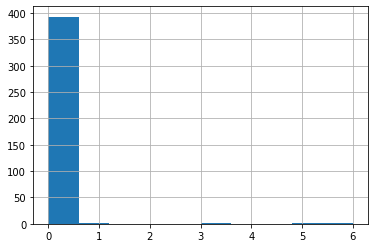

In [25]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count